In [50]:
pip install pysm3

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np

In [52]:
%matplotlib inline

import numpy as np
import pylab as plt

In [53]:
!pip3 install pygdsm
!pip3 install pygdsm

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import math
import ephem
from scipy.signal import correlate

from scipy.optimize import curve_fit

%matplotlib inline
from pygdsm import GlobalSkyModel


from astropy.timeseries import TimeSeries, BinnedTimeSeries
from astropy.time import Time, TimeDelta
from astropy.coordinates import Galactic, SkyCoord, FK5, EarthLocation, AltAz, Angle
import astropy.units as u

import pandas as pd
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline, RegularGridInterpolator

In [54]:
start_time_in_UTC = '2012-05-19 05:45:00'
n_spectra = 1                  #Number of spectra to be taken
delta_t_in_hours = 1            #Time interval between each spectra needed in hours

t = Time(start_time_in_UTC, format = 'iso', scale= 'utc')

ts = TimeSeries(time_start= start_time_in_UTC, time_delta= delta_t_in_hours *u.hour, n_samples= n_spectra)
ts = ts.time
print(ts)

['2012-05-19 05:45:00.000']


In [87]:
import glob
import os
import numpy as np
from scipy import interpolate

'''
## In the rt_file, mention the filename of S11. Please check if it is in linear form. 

rt_file    = 'dipole_correct.txt'
file_list  = sorted(glob.glob(os.path.join(beam_path,"*farfield*.txt")))
#print(file_list)



gamme_file = os.path.join(beam_path, rt_file)

gamma_freq = []
gamma_val  = []

with open(gamme_file) as fa:
    for line_aa in fa.readlines()[2:]:
        line_aa = line_aa.strip()
        col1    = line_aa.split('\t')
        _freq   = np.array(list(map(float, col1[0].split())))[0]
        _val    = np.array(list(map(float, col1[1].split())))[0]
        gamma_freq.append(_freq)
        gamma_val.append(_val)
        
gamma_freq = np.array(gamma_freq)
gamma_val  = np.array(gamma_val)
gamma_val=10**(gamma_val/20)

print(gamma_freq)
print(gamma_val)
gamma_func = interpolate.interp1d(gamma_freq, gamma_val)  '''


## This below print statement is to verify our interpolation. print(gamma_func(any freq value)) 
## and check if it matches the value in the file
#print(gamma_func(2.8))


## The below code is for the beam definition. Please make sure to check the beam_def function before proceeding

'''
phi_res   = 1
theta_res = 1

phi_array   = np.arange(0, 360, phi_res)
theta_array = np.arange(90, -90-theta_res, -theta_res) 
freq_array  = []
file_array  = []

def get_freq_from_file(filename):
    _temp = os.path.basename(filename).replace('.txt','').replace('farfield','').replace('(f=','').replace(')','').replace('[1]','')
    return float(_temp)
    
for ii, file_add in enumerate(file_list):
    freq_array.append(get_freq_from_file(file_add))
    file_array.append(file_add)
    
print(get_freq_from_file('farfield(f=2.608)[1].txt'))
    
np.testing.assert_array_equal(file_array, file_list)

freq_array = np.array(freq_array)
file_array = np.array(file_array)

isort      = np.argsort(freq_array)
freq_array = freq_array[isort]
file_array = file_array[isort]

beam_3D_unnorm = np.zeros((len(freq_array), len(theta_array), len(phi_array)))

'''
'''
for ii, freq in enumerate(freq_array):
    print("Processing frequency {} GHz".format(freq))
    file_add = file_array[ii]
    with open(file_add) as fa:
        for line_aa in fa.readlines()[2:]:
            line_aa = line_aa.strip()
            col1    = line_aa.split('\t')
            all_val = np.array(list(map(float, col1[0].split())))

            theta   = 90-all_val[0] 
            phi     = all_val[1]
            beam    = all_val[2]
            print(theta)
            

            iphi    = np.where(phi_array==phi)[0][0]
            itheta  = np.where(theta_array==theta)[0][0]
            beam_3D_unnorm[ii, itheta, iphi] = 10**(beam/10)
            


beam_3D = np.zeros((len(freq_array), len(theta_array), len(phi_array)))

print(beam_3D_unnorm[0, :,:].shape)


for ifreq in range(beam_3D.shape[0]):
    for itheta in range(beam_3D.shape[1]):
        for iphi in range(beam_3D.shape[2]):
            beam_3D[ifreq, itheta,iphi] = beam_3D_unnorm[ifreq, itheta,iphi]/np.amax(beam_3D_unnorm[ifreq,:,:])


print(freq_array)    

        
theta_array_new = np.flip(theta_array)
phi_array_new   = phi_array
beam_3D_flip=np.flip(beam_3D,axis=1)
print(beam_3D_flip[2,:,0],beam_3D[2,:,0])
from scipy.interpolate import RegularGridInterpolator
my_interpolating_function = RegularGridInterpolator((freq_array, theta_array_new,
                                                     phi_array_new), beam_3D_flip)
print(my_interpolating_function.shape)

'''

## Beam definition
## If only the effect of S11 has to be checked (with ideal antenna beam), use the sin^(theta) beam. 

## Added

#freq = [408, 1420, 23000]
#phi_res   = 1
#theta_res = 1

#az   = np.arange(0, 360, phi_res)
#alt = np.arange(90, -90-theta_res, -theta_res) 

## Added ends

def beam_def(freq, alt, az):
    if (alt<=0):
        return 0
    else:
        return (math.cos(alt*PI/180)*math.sin(alt*PI/180))


    
#plt.plot(gamma_freq, gamma_val)
#plt.xlim([2,4])
#plt.show()

In [56]:
h = 6.62607157e-34
k = 1.3806488e-23
c = 2.99792458e+08
TCMB = 2.72548
f_start = 2000                  #Check the f_start and f_stop and change the number of channels accordingly
f_stop = 6000
No_of_Channels = 252
Channel_width = 1000
#N_SIDE = 64
T_hot = 3730
T_cold = 2730                    #T_cold and T_hot in Kelvins
Time_in_UTC = ts
latitude = 13.067439
longitude =80.237617            #Latitude and longitude in degrees
altitude = 0                     #Altitude in meters
alpha = 0.0065                   #Temp. lapse rate (deg C per meter)
PI = 3.14159265
Noise_int_time = 3e+13
Trx = 14
T_atm = 1
frequencies = np.linspace(f_start,f_stop, No_of_Channels, endpoint=True)
CMB_Int = np.empty([No_of_Channels])
P_hot = np.empty(No_of_Channels)
P_cold = np.empty(No_of_Channels)
P_dif = np.empty(No_of_Channels)
cross_real = [0]*No_of_Channels
cross_imag = [0]*No_of_Channels
sumwt = [0]*No_of_Channels
sigma = [0]*No_of_Channels
spectra = [0]*n_spectra
spectra_cross_imag = [0]*n_spectra
#NPIX = hp.nside2npix(N_SIDE)

#Refraction correction formula
def refraction(alt_in_deg, altitude):
    pres = 1010.*math.pow((1-6.5/288000*altitude),5.255)
    if (altitude>11000):
        temp = 211.5
    else:
        temp = 283.0 - (alpha * altitude)
    R = 1.02/math.tan((alt_in_deg + (10.3/(alt_in_deg + 5.11)))*(PI/180))
    if (alt_in_deg == 90):
        R = R+ 0.0019279
    tpcor = (pres/1000) * (283/temp)
    R =  tpcor*(R/60)
    return alt_in_deg +R



Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc',location= EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg, height=altitude*u.m))
lst = t.sidereal_time('apparent')
print(lst)
#plt.xlabel('Altitutde')
#plt.ylabel('Gain')
#plt.plot(alt[1:180],beam_3D_flip[50,1:180,0]) 
print(beam_def(2.8,-70,0))
print (frequencies)
#print(NPIX)
#plt.plot(beam_3D[100,1:90,0])

[2h55m09.67251165s]
0
[2000.         2015.93625498 2031.87250996 2047.80876494 2063.74501992
 2079.6812749  2095.61752988 2111.55378486 2127.49003984 2143.42629482
 2159.3625498  2175.29880478 2191.23505976 2207.17131474 2223.10756972
 2239.0438247  2254.98007968 2270.91633466 2286.85258964 2302.78884462
 2318.7250996  2334.66135458 2350.59760956 2366.53386454 2382.47011952
 2398.4063745  2414.34262948 2430.27888446 2446.21513944 2462.15139442
 2478.0876494  2494.02390438 2509.96015936 2525.89641434 2541.83266932
 2557.7689243  2573.70517928 2589.64143426 2605.57768924 2621.51394422
 2637.4501992  2653.38645418 2669.32270916 2685.25896414 2701.19521912
 2717.1314741  2733.06772908 2749.00398406 2764.94023904 2780.87649402
 2796.812749   2812.74900398 2828.68525896 2844.62151394 2860.55776892
 2876.4940239  2892.43027888 2908.36653386 2924.30278884 2940.23904382
 2956.1752988  2972.11155378 2988.04780876 3003.98406375 3019.92031873
 3035.85657371 3051.79282869 3067.72908367 3083.6653386

In [57]:
from pygdsm import GlobalSkyModel16
from pygdsm import GlobalSkyModel

In [58]:
CMB_Int = ((2*h*1e+27*frequencies**3)/(c*c))/(np.exp((h*frequencies*1e+9)/(k*TCMB))-1)
print("Got CMB Int!")

#P_hot and P_cold for calibration
P_hot = (2*h*frequencies*1e9)/(np.exp((h*frequencies*1e9)/(k*T_hot))-1)
P_cold = (2*h*frequencies*1e9)/(np.exp((h*frequencies*1e9)/(k*T_cold))-1)
P_dif = P_hot -P_cold

print("Got P_dif for calibration!")

Got CMB Int!
Got P_dif for calibration!


In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
sky = pysm3.Sky(nside=128, preset_strings=["s1"])

PySM initializes the requested component objects (generally load the input templates maps with `astropy.utils.data` and cache them locally in `~/.astropy`) and stores them in the `components` attribute (a list):

In [61]:
sky.components

In [64]:
map_2GHz = sky.get_emission(2 * u.GHz)

In [65]:
map_2GHz[0, :3] 

<Quantity [74276.914, 74846.07 , 87571.47 ] uK_RJ>

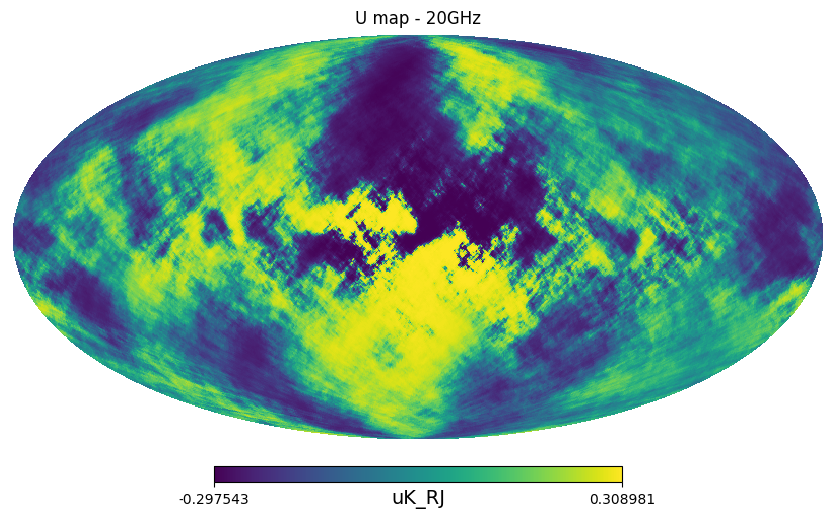

In [66]:
#map_2GHz = map_2GHz.to(u.K_CMB, equivalencies=u.cmb_equivalencies(2*u.GHz))

hp.mollview(map_2GHz[2]*(10**-6), title="U map - 20GHz", norm = 'hist ', unit=map_2GHz.unit)

In [21]:
gsm_2016 = GlobalSkyModel16()

fits_output_dir = "/Users/hshishir/Desktop/polarization_maps/I/fits_file(128)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/I/maps_tx(128)"

os.makedirs(fits_output_dir, exist_ok=True)
os.makedirs(txt_output_dir, exist_ok=True)

for freq in frequencies:
    print(f"Processing {freq} MHz...")

    map_2GHz = sky.get_emission(freq * u.GHz)
    map_2GHz_0 = map_2GHz[0]

    # Save the map as a FITS file
    fits_file_path = os.path.join(fits_output_dir, f"map_{freq}.fits")
    hp.write_map(fits_file_path, map_2GHz_0, overwrite=True)

    # Read the map from the FITS file (to ensure compatibility)
    sky_map_tx = hp.read_map(fits_file_path)

    # Save the map as a text file
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    np.savetxt(txt_file_path, sky_map_tx)

    print(f"Completed {freq} MHz.")

print("All maps have been processed and saved!")


setting the output map dtype to [dtype('float32')]


Processing 2000.0 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2000.0 MHz.
Processing 2015.9362549800796 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2015.9362549800796 MHz.
Processing 2031.8725099601593 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2031.8725099601593 MHz.
Processing 2047.8087649402391 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2047.8087649402391 MHz.
Processing 2063.7450199203186 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2063.7450199203186 MHz.
Processing 2079.6812749003984 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2079.6812749003984 MHz.
Processing 2095.6175298804783 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2095.6175298804783 MHz.
Processing 2111.5537848605577 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2111.5537848605577 MHz.
Processing 2127.4900398406376 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2127.4900398406376 MHz.
Processing 2143.426294820717 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2143.426294820717 MHz.
Processing 2159.362549800797 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2159.362549800797 MHz.
Processing 2175.2988047808767 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2175.2988047808767 MHz.
Processing 2191.235059760956 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2191.235059760956 MHz.
Processing 2207.171314741036 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2207.171314741036 MHz.
Processing 2223.1075697211154 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2223.1075697211154 MHz.
Processing 2239.0438247011953 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2239.0438247011953 MHz.
Processing 2254.980079681275 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2254.980079681275 MHz.
Processing 2270.9163346613545 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2270.9163346613545 MHz.
Processing 2286.8525896414344 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2286.8525896414344 MHz.
Processing 2302.788844621514 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2302.788844621514 MHz.
Processing 2318.7250996015937 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2318.7250996015937 MHz.
Processing 2334.6613545816735 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2334.6613545816735 MHz.
Processing 2350.597609561753 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2350.597609561753 MHz.
Processing 2366.533864541833 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2366.533864541833 MHz.
Processing 2382.4701195219122 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2382.4701195219122 MHz.
Processing 2398.406374501992 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2398.406374501992 MHz.
Processing 2414.342629482072 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2414.342629482072 MHz.
Processing 2430.2788844621514 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2430.2788844621514 MHz.
Processing 2446.2151394422312 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2446.2151394422312 MHz.
Processing 2462.1513944223107 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2462.1513944223107 MHz.
Processing 2478.0876494023905 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2478.0876494023905 MHz.
Processing 2494.02390438247 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2494.02390438247 MHz.
Processing 2509.96015936255 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2509.96015936255 MHz.
Processing 2525.896414342629 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2525.896414342629 MHz.
Processing 2541.832669322709 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2541.832669322709 MHz.
Processing 2557.768924302789 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2557.768924302789 MHz.
Processing 2573.705179282869 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2573.705179282869 MHz.
Processing 2589.641434262948 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2589.641434262948 MHz.
Processing 2605.5776892430276 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2605.5776892430276 MHz.
Processing 2621.5139442231075 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2621.5139442231075 MHz.
Processing 2637.4501992031874 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2637.4501992031874 MHz.
Processing 2653.386454183267 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2653.386454183267 MHz.
Processing 2669.3227091633466 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2669.3227091633466 MHz.
Processing 2685.258964143426 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2685.258964143426 MHz.
Processing 2701.195219123506 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2701.195219123506 MHz.
Processing 2717.131474103586 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2717.131474103586 MHz.
Processing 2733.067729083665 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2733.067729083665 MHz.
Processing 2749.003984063745 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2749.003984063745 MHz.
Processing 2764.9402390438245 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2764.9402390438245 MHz.
Processing 2780.8764940239043 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2780.8764940239043 MHz.
Processing 2796.812749003984 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2796.812749003984 MHz.
Processing 2812.7490039840636 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2812.7490039840636 MHz.
Processing 2828.6852589641435 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2828.6852589641435 MHz.
Processing 2844.621513944223 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2844.621513944223 MHz.
Processing 2860.5577689243028 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2860.5577689243028 MHz.
Processing 2876.4940239043826 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2876.4940239043826 MHz.
Processing 2892.430278884462 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2892.430278884462 MHz.
Processing 2908.366533864542 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2908.366533864542 MHz.
Processing 2924.3027888446213 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2924.3027888446213 MHz.
Processing 2940.239043824701 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2940.239043824701 MHz.
Processing 2956.175298804781 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2956.175298804781 MHz.
Processing 2972.1115537848605 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2972.1115537848605 MHz.
Processing 2988.0478087649403 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2988.0478087649403 MHz.
Processing 3003.9840637450197 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3003.9840637450197 MHz.
Processing 3019.9203187250996 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3019.9203187250996 MHz.
Processing 3035.8565737051795 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3035.8565737051795 MHz.
Processing 3051.792828685259 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3051.792828685259 MHz.
Processing 3067.7290836653387 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3067.7290836653387 MHz.
Processing 3083.665338645418 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3083.665338645418 MHz.
Processing 3099.601593625498 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3099.601593625498 MHz.
Processing 3115.537848605578 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3115.537848605578 MHz.
Processing 3131.4741035856573 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3131.4741035856573 MHz.
Processing 3147.410358565737 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3147.410358565737 MHz.
Processing 3163.3466135458166 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3163.3466135458166 MHz.
Processing 3179.2828685258964 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3179.2828685258964 MHz.
Processing 3195.2191235059763 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3195.2191235059763 MHz.
Processing 3211.1553784860557 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3211.1553784860557 MHz.
Processing 3227.091633466135 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3227.091633466135 MHz.
Processing 3243.027888446215 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3243.027888446215 MHz.
Processing 3258.964143426295 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3258.964143426295 MHz.
Processing 3274.9003984063747 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3274.9003984063747 MHz.
Processing 3290.836653386454 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3290.836653386454 MHz.
Processing 3306.7729083665336 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3306.7729083665336 MHz.
Processing 3322.7091633466134 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3322.7091633466134 MHz.
Processing 3338.6454183266933 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3338.6454183266933 MHz.
Processing 3354.581673306773 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3354.581673306773 MHz.
Processing 3370.5179282868526 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3370.5179282868526 MHz.
Processing 3386.454183266932 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3386.454183266932 MHz.
Processing 3402.390438247012 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3402.390438247012 MHz.
Processing 3418.3266932270917 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3418.3266932270917 MHz.
Processing 3434.2629482071716 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3434.2629482071716 MHz.
Processing 3450.199203187251 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3450.199203187251 MHz.
Processing 3466.1354581673304 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3466.1354581673304 MHz.
Processing 3482.0717131474103 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3482.0717131474103 MHz.
Processing 3498.00796812749 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3498.00796812749 MHz.
Processing 3513.94422310757 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3513.94422310757 MHz.
Processing 3529.8804780876494 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3529.8804780876494 MHz.
Processing 3545.816733067729 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3545.816733067729 MHz.
Processing 3561.7529880478087 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3561.7529880478087 MHz.
Processing 3577.6892430278886 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3577.6892430278886 MHz.
Processing 3593.6254980079684 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3593.6254980079684 MHz.
Processing 3609.561752988048 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3609.561752988048 MHz.
Processing 3625.4980079681272 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3625.4980079681272 MHz.
Processing 3641.434262948207 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3641.434262948207 MHz.
Processing 3657.370517928287 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3657.370517928287 MHz.
Processing 3673.306772908367 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3673.306772908367 MHz.
Processing 3689.2430278884462 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3689.2430278884462 MHz.
Processing 3705.1792828685257 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3705.1792828685257 MHz.
Processing 3721.1155378486055 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3721.1155378486055 MHz.
Processing 3737.0517928286854 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3737.0517928286854 MHz.
Processing 3752.9880478087653 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3752.9880478087653 MHz.
Processing 3768.9243027888447 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3768.9243027888447 MHz.
Processing 3784.860557768924 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3784.860557768924 MHz.
Processing 3800.796812749004 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3800.796812749004 MHz.
Processing 3816.733067729084 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3816.733067729084 MHz.
Processing 3832.6693227091637 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3832.6693227091637 MHz.
Processing 3848.605577689243 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3848.605577689243 MHz.
Processing 3864.5418326693225 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3864.5418326693225 MHz.
Processing 3880.4780876494024 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3880.4780876494024 MHz.
Processing 3896.4143426294822 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3896.4143426294822 MHz.
Processing 3912.3505976095616 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3912.3505976095616 MHz.
Processing 3928.2868525896415 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3928.2868525896415 MHz.
Processing 3944.223107569721 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3944.223107569721 MHz.
Processing 3960.159362549801 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3960.159362549801 MHz.
Processing 3976.0956175298807 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3976.0956175298807 MHz.
Processing 3992.03187250996 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3992.03187250996 MHz.
Processing 4007.96812749004 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4007.96812749004 MHz.
Processing 4023.9043824701193 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4023.9043824701193 MHz.
Processing 4039.840637450199 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4039.840637450199 MHz.
Processing 4055.776892430279 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4055.776892430279 MHz.
Processing 4071.7131474103585 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4071.7131474103585 MHz.
Processing 4087.6494023904384 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4087.6494023904384 MHz.
Processing 4103.585657370518 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4103.585657370518 MHz.
Processing 4119.521912350598 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4119.521912350598 MHz.
Processing 4135.4581673306775 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4135.4581673306775 MHz.
Processing 4151.394422310757 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4151.394422310757 MHz.
Processing 4167.330677290836 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4167.330677290836 MHz.
Processing 4183.266932270916 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4183.266932270916 MHz.
Processing 4199.203187250996 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4199.203187250996 MHz.
Processing 4215.139442231076 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4215.139442231076 MHz.
Processing 4231.075697211156 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4231.075697211156 MHz.
Processing 4247.011952191235 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4247.011952191235 MHz.
Processing 4262.948207171315 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4262.948207171315 MHz.
Processing 4278.8844621513945 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4278.8844621513945 MHz.
Processing 4294.820717131474 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4294.820717131474 MHz.
Processing 4310.756972111554 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4310.756972111554 MHz.
Processing 4326.693227091633 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4326.693227091633 MHz.
Processing 4342.629482071713 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4342.629482071713 MHz.
Processing 4358.565737051793 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4358.565737051793 MHz.
Processing 4374.501992031872 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4374.501992031872 MHz.
Processing 4390.438247011953 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4390.438247011953 MHz.
Processing 4406.374501992032 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4406.374501992032 MHz.
Processing 4422.310756972111 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4422.310756972111 MHz.
Processing 4438.247011952191 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4438.247011952191 MHz.
Processing 4454.18326693227 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4454.18326693227 MHz.
Processing 4470.119521912351 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4470.119521912351 MHz.
Processing 4486.05577689243 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4486.05577689243 MHz.
Processing 4501.99203187251 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4501.99203187251 MHz.
Processing 4517.92828685259 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4517.92828685259 MHz.
Processing 4533.864541832669 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4533.864541832669 MHz.
Processing 4549.8007968127495 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4549.8007968127495 MHz.
Processing 4565.737051792828 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4565.737051792828 MHz.
Processing 4581.673306772908 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4581.673306772908 MHz.
Processing 4597.609561752988 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4597.609561752988 MHz.
Processing 4613.545816733067 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4613.545816733067 MHz.
Processing 4629.482071713148 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4629.482071713148 MHz.
Processing 4645.418326693227 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4645.418326693227 MHz.
Processing 4661.354581673307 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4661.354581673307 MHz.
Processing 4677.290836653387 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4677.290836653387 MHz.
Processing 4693.2270916334655 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4693.2270916334655 MHz.
Processing 4709.163346613546 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4709.163346613546 MHz.
Processing 4725.099601593625 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4725.099601593625 MHz.
Processing 4741.035856573705 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4741.035856573705 MHz.
Processing 4756.972111553785 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4756.972111553785 MHz.
Processing 4772.908366533864 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4772.908366533864 MHz.
Processing 4788.844621513945 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4788.844621513945 MHz.
Processing 4804.780876494024 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4804.780876494024 MHz.
Processing 4820.717131474104 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4820.717131474104 MHz.
Processing 4836.653386454183 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4836.653386454183 MHz.
Processing 4852.589641434262 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4852.589641434262 MHz.
Processing 4868.525896414343 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4868.525896414343 MHz.
Processing 4884.462151394422 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4884.462151394422 MHz.
Processing 4900.398406374502 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4900.398406374502 MHz.
Processing 4916.334661354582 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4916.334661354582 MHz.
Processing 4932.270916334661 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4932.270916334661 MHz.
Processing 4948.207171314742 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4948.207171314742 MHz.
Processing 4964.1434262948205 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4964.1434262948205 MHz.
Processing 4980.0796812749 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4980.0796812749 MHz.
Processing 4996.01593625498 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4996.01593625498 MHz.
Processing 5011.952191235059 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5011.952191235059 MHz.
Processing 5027.88844621514 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5027.88844621514 MHz.
Processing 5043.824701195219 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5043.824701195219 MHz.
Processing 5059.760956175299 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5059.760956175299 MHz.
Processing 5075.697211155379 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5075.697211155379 MHz.
Processing 5091.633466135458 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5091.633466135458 MHz.
Processing 5107.569721115538 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5107.569721115538 MHz.
Processing 5123.505976095617 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5123.505976095617 MHz.
Processing 5139.442231075697 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5139.442231075697 MHz.
Processing 5155.378486055777 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5155.378486055777 MHz.
Processing 5171.314741035856 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5171.314741035856 MHz.
Processing 5187.250996015937 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5187.250996015937 MHz.
Processing 5203.187250996016 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5203.187250996016 MHz.
Processing 5219.123505976096 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5219.123505976096 MHz.
Processing 5235.0597609561755 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5235.0597609561755 MHz.
Processing 5250.9960159362545 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5250.9960159362545 MHz.
Processing 5266.932270916335 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5266.932270916335 MHz.
Processing 5282.868525896414 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5282.868525896414 MHz.
Processing 5298.804780876494 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5298.804780876494 MHz.
Processing 5314.741035856574 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5314.741035856574 MHz.
Processing 5330.677290836653 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5330.677290836653 MHz.
Processing 5346.613545816734 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5346.613545816734 MHz.
Processing 5362.549800796813 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5362.549800796813 MHz.
Processing 5378.4860557768925 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5378.4860557768925 MHz.
Processing 5394.422310756972 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5394.422310756972 MHz.
Processing 5410.358565737051 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5410.358565737051 MHz.
Processing 5426.294820717132 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5426.294820717132 MHz.
Processing 5442.231075697211 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5442.231075697211 MHz.
Processing 5458.167330677291 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5458.167330677291 MHz.
Processing 5474.103585657371 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5474.103585657371 MHz.
Processing 5490.03984063745 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5490.03984063745 MHz.
Processing 5505.9760956175305 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5505.9760956175305 MHz.
Processing 5521.9123505976095 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5521.9123505976095 MHz.
Processing 5537.848605577689 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5537.848605577689 MHz.
Processing 5553.784860557769 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5553.784860557769 MHz.
Processing 5569.721115537848 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5569.721115537848 MHz.
Processing 5585.657370517929 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5585.657370517929 MHz.
Processing 5601.593625498008 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5601.593625498008 MHz.
Processing 5617.529880478088 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5617.529880478088 MHz.
Processing 5633.466135458168 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5633.466135458168 MHz.
Processing 5649.402390438247 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5649.402390438247 MHz.
Processing 5665.338645418327 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5665.338645418327 MHz.
Processing 5681.274900398406 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5681.274900398406 MHz.
Processing 5697.211155378486 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5697.211155378486 MHz.
Processing 5713.147410358566 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5713.147410358566 MHz.
Processing 5729.083665338645 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5729.083665338645 MHz.
Processing 5745.019920318726 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5745.019920318726 MHz.
Processing 5760.956175298805 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5760.956175298805 MHz.
Processing 5776.892430278885 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5776.892430278885 MHz.
Processing 5792.8286852589645 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5792.8286852589645 MHz.
Processing 5808.764940239043 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5808.764940239043 MHz.
Processing 5824.701195219123 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5824.701195219123 MHz.
Processing 5840.637450199203 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5840.637450199203 MHz.
Processing 5856.573705179283 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5856.573705179283 MHz.
Processing 5872.509960159363 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5872.509960159363 MHz.
Processing 5888.446215139442 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5888.446215139442 MHz.
Processing 5904.382470119522 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5904.382470119522 MHz.
Processing 5920.318725099602 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5920.318725099602 MHz.
Processing 5936.254980079681 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5936.254980079681 MHz.
Processing 5952.191235059761 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5952.191235059761 MHz.
Processing 5968.12749003984 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5968.12749003984 MHz.
Processing 5984.06374501992 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5984.06374501992 MHz.
Processing 6000.0 MHz...
Completed 6000.0 MHz.
All maps have been processed and saved!


In [67]:
maps = []
combined_output_dir = "/Users/hshishir/Desktop/polarization_maps/I/maps_tx(128)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/I/maps_tx(128)"

for freq in frequencies:
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    maps.append(np.loadtxt(txt_file_path))

combined_array = np.column_stack(maps)

combined_txt_path = os.path.join(combined_output_dir, 'combined_maps.txt')
np.savetxt(combined_txt_path, combined_array)

print("All maps have been processed and saved!")
print("Combined Array:\n", combined_array)

All maps have been processed and saved!
Combined Array:
 [[7.09797168e-05 6.93060574e-05 6.76845812e-05 ... 2.65209428e-06
  2.63091601e-06 2.60996262e-06]
 [7.17040602e-05 7.00135279e-05 6.83756953e-05 ... 2.68022745e-06
  2.65882727e-06 2.63765401e-06]
 [8.33237937e-05 8.13586666e-05 7.94548178e-05 ... 3.11119447e-06
  3.08634503e-06 3.06175912e-06]
 ...
 [8.48682394e-05 8.28616103e-05 8.09176781e-05 ... 3.14224167e-06
  3.11708004e-06 3.09218603e-06]
 [9.37828154e-05 9.15669516e-05 8.94202676e-05 ... 3.48031926e-06
  3.45246985e-06 3.42491649e-06]
 [8.29294950e-05 8.09690173e-05 7.90697813e-05 ... 3.07207688e-06
  3.04748119e-06 3.02314675e-06]]


Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
Number of pixels got:  50000
Number of pixels got:  60000
Number of pixels got:  70000
Number of pixels got:  80000
Number of pixels got:  90000
Number of pixels got:  100000
Number of pixels got:  110000
Number of pixels got:  120000
Number of pixels got:  130000
Number of pixels got:  140000
Number of pixels got:  150000
Number of pixels got:  160000
Number of pixels got:  170000
Number of pixels got:  180000
Number of pixels got:  190000
No. of spectra got =  1


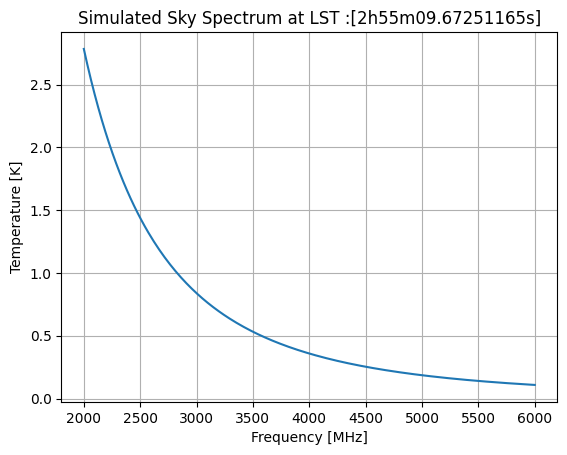

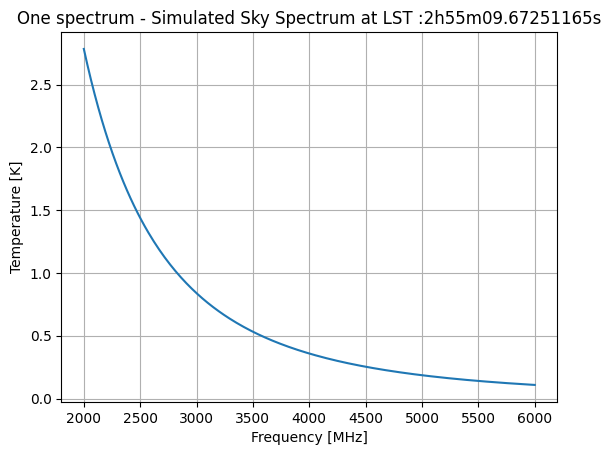

In [31]:
t = 0
while t < n_spectra:
    i = 0
    while i < 196608:  # Working on each pixel
        coords = hp.pixelfunc.pix2ang(128, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
        gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

        # Now, the coordinates in Galactic frame are changed to equatorial frame below
        equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude)

        

        # Using power law relation to fit spectra of three frequency maps
        #def func(xx, a):
            #return sky_408[i - 1] * np.power((xx / 0.408), a)

        #xx = np.array([0.408, 1.420, 23])
        #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

        #popt, pcov = curve_fit(func, xx, yy)
        #a_param = popt[0]

        j = 0
        longitudes = equi.az.value
        while j < 252:
            new_map1 = combined_array[:,j]
            if longitudes > 359.00:
                longitudes = 359.00
            cwt = beam_def(frequencies[j], new_alt, longitudes)
            if cwt > 0:  # Adding all the three intensities
                map_1 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map1[i - 1]) / (c ** 2)
                Power = (map_1 * cwt + CMB_Int[j]) * (c * c / (1e+12 * frequencies[j] ** 2))  # +Rec_int[j]
                final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                cross_real[j] = cross_real[j] + 1 * final_temp
                sumwt[j] = sumwt[j] + cwt
            j = j + 1

        if i % 10000 == 0:
            print('Number of pixels got: ', i)

        i = i + 1

    i = 0
    while i < No_of_Channels:
        if sumwt[i] > 0:
            cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
        i = i + 1

   

    sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

    # Generating an array of random integers with mean 0 and std 1.
    array = np.random.normal(0, 1, No_of_Channels)

    # Adding the gaussian error
    cross_real = cross_real + array * sigma
    cross_imag = cross_imag + array * sigma

    spectra[t] = cross_real
    spectra_cross_imag[t] = cross_imag

    cross_real = [0] * No_of_Channels
    cross_imag = [0] * No_of_Channels
    sumwt = [0] * No_of_Channels
    sigma = [0] * No_of_Channels
    
    print("No. of spectra got = ", t + 1)

    t = t + 1

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
lst = t.sidereal_time('apparent')

i = 0
while i < n_spectra:
    plt.plot(frequencies, spectra[i])
    i = i + 1

plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s' % lst)
plt.grid()
plt.show()

plt.plot(frequencies, spectra[0])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s' % lst[0])
plt.grid()
plt.show()

In [32]:
gsm_2016 = GlobalSkyModel16()

fits_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q/fits_file(128)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q/maps_tx(128)"

os.makedirs(fits_output_dir, exist_ok=True)
os.makedirs(txt_output_dir, exist_ok=True)

for freq in frequencies:
    print(f"Processing {freq} MHz...")

    map_2GHz = sky.get_emission(freq * u.GHz)
    map_2GHz_1 = map_2GHz[1]

    # Save the map as a FITS file
    fits_file_path = os.path.join(fits_output_dir, f"map_{freq}.fits")
    hp.write_map(fits_file_path, map_2GHz_1, overwrite=True)

    # Read the map from the FITS file (to ensure compatibility)
    sky_map_tx = hp.read_map(fits_file_path)

    # Save the map as a text file
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    np.savetxt(txt_file_path, sky_map_tx)

    print(f"Completed {freq} MHz.")

print("All maps have been processed and saved!")


setting the output map dtype to [dtype('float32')]


Processing 2000.0 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2000.0 MHz.
Processing 2015.9362549800796 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2015.9362549800796 MHz.
Processing 2031.8725099601593 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2031.8725099601593 MHz.
Processing 2047.8087649402391 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2047.8087649402391 MHz.
Processing 2063.7450199203186 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2063.7450199203186 MHz.
Processing 2079.6812749003984 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2079.6812749003984 MHz.
Processing 2095.6175298804783 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2095.6175298804783 MHz.
Processing 2111.5537848605577 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2111.5537848605577 MHz.
Processing 2127.4900398406376 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2127.4900398406376 MHz.
Processing 2143.426294820717 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2143.426294820717 MHz.
Processing 2159.362549800797 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2159.362549800797 MHz.
Processing 2175.2988047808767 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2175.2988047808767 MHz.
Processing 2191.235059760956 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2191.235059760956 MHz.
Processing 2207.171314741036 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2207.171314741036 MHz.
Processing 2223.1075697211154 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2223.1075697211154 MHz.
Processing 2239.0438247011953 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2239.0438247011953 MHz.
Processing 2254.980079681275 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2254.980079681275 MHz.
Processing 2270.9163346613545 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2270.9163346613545 MHz.
Processing 2286.8525896414344 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2286.8525896414344 MHz.
Processing 2302.788844621514 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2302.788844621514 MHz.
Processing 2318.7250996015937 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2318.7250996015937 MHz.
Processing 2334.6613545816735 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2334.6613545816735 MHz.
Processing 2350.597609561753 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2350.597609561753 MHz.
Processing 2366.533864541833 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2366.533864541833 MHz.
Processing 2382.4701195219122 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2382.4701195219122 MHz.
Processing 2398.406374501992 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2398.406374501992 MHz.
Processing 2414.342629482072 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2414.342629482072 MHz.
Processing 2430.2788844621514 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2430.2788844621514 MHz.
Processing 2446.2151394422312 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2446.2151394422312 MHz.
Processing 2462.1513944223107 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2462.1513944223107 MHz.
Processing 2478.0876494023905 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2478.0876494023905 MHz.
Processing 2494.02390438247 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2494.02390438247 MHz.
Processing 2509.96015936255 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2509.96015936255 MHz.
Processing 2525.896414342629 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2525.896414342629 MHz.
Processing 2541.832669322709 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2541.832669322709 MHz.
Processing 2557.768924302789 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2557.768924302789 MHz.
Processing 2573.705179282869 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2573.705179282869 MHz.
Processing 2589.641434262948 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2589.641434262948 MHz.
Processing 2605.5776892430276 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2605.5776892430276 MHz.
Processing 2621.5139442231075 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2621.5139442231075 MHz.
Processing 2637.4501992031874 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2637.4501992031874 MHz.
Processing 2653.386454183267 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2653.386454183267 MHz.
Processing 2669.3227091633466 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2669.3227091633466 MHz.
Processing 2685.258964143426 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2685.258964143426 MHz.
Processing 2701.195219123506 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2701.195219123506 MHz.
Processing 2717.131474103586 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2717.131474103586 MHz.
Processing 2733.067729083665 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2733.067729083665 MHz.
Processing 2749.003984063745 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2749.003984063745 MHz.
Processing 2764.9402390438245 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2764.9402390438245 MHz.
Processing 2780.8764940239043 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2780.8764940239043 MHz.
Processing 2796.812749003984 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2796.812749003984 MHz.
Processing 2812.7490039840636 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2812.7490039840636 MHz.
Processing 2828.6852589641435 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2828.6852589641435 MHz.
Processing 2844.621513944223 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2844.621513944223 MHz.
Processing 2860.5577689243028 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2860.5577689243028 MHz.
Processing 2876.4940239043826 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2876.4940239043826 MHz.
Processing 2892.430278884462 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2892.430278884462 MHz.
Processing 2908.366533864542 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2908.366533864542 MHz.
Processing 2924.3027888446213 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2924.3027888446213 MHz.
Processing 2940.239043824701 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2940.239043824701 MHz.
Processing 2956.175298804781 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2956.175298804781 MHz.
Processing 2972.1115537848605 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2972.1115537848605 MHz.
Processing 2988.0478087649403 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2988.0478087649403 MHz.
Processing 3003.9840637450197 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3003.9840637450197 MHz.
Processing 3019.9203187250996 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3019.9203187250996 MHz.
Processing 3035.8565737051795 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3035.8565737051795 MHz.
Processing 3051.792828685259 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3051.792828685259 MHz.
Processing 3067.7290836653387 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3067.7290836653387 MHz.
Processing 3083.665338645418 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3083.665338645418 MHz.
Processing 3099.601593625498 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3099.601593625498 MHz.
Processing 3115.537848605578 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3115.537848605578 MHz.
Processing 3131.4741035856573 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3131.4741035856573 MHz.
Processing 3147.410358565737 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3147.410358565737 MHz.
Processing 3163.3466135458166 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3163.3466135458166 MHz.
Processing 3179.2828685258964 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3179.2828685258964 MHz.
Processing 3195.2191235059763 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3195.2191235059763 MHz.
Processing 3211.1553784860557 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3211.1553784860557 MHz.
Processing 3227.091633466135 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3227.091633466135 MHz.
Processing 3243.027888446215 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3243.027888446215 MHz.
Processing 3258.964143426295 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3258.964143426295 MHz.
Processing 3274.9003984063747 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3274.9003984063747 MHz.
Processing 3290.836653386454 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3290.836653386454 MHz.
Processing 3306.7729083665336 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3306.7729083665336 MHz.
Processing 3322.7091633466134 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3322.7091633466134 MHz.
Processing 3338.6454183266933 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3338.6454183266933 MHz.
Processing 3354.581673306773 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3354.581673306773 MHz.
Processing 3370.5179282868526 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3370.5179282868526 MHz.
Processing 3386.454183266932 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3386.454183266932 MHz.
Processing 3402.390438247012 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3402.390438247012 MHz.
Processing 3418.3266932270917 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3418.3266932270917 MHz.
Processing 3434.2629482071716 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3434.2629482071716 MHz.
Processing 3450.199203187251 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3450.199203187251 MHz.
Processing 3466.1354581673304 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3466.1354581673304 MHz.
Processing 3482.0717131474103 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3482.0717131474103 MHz.
Processing 3498.00796812749 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3498.00796812749 MHz.
Processing 3513.94422310757 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3513.94422310757 MHz.
Processing 3529.8804780876494 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3529.8804780876494 MHz.
Processing 3545.816733067729 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3545.816733067729 MHz.
Processing 3561.7529880478087 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3561.7529880478087 MHz.
Processing 3577.6892430278886 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3577.6892430278886 MHz.
Processing 3593.6254980079684 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3593.6254980079684 MHz.
Processing 3609.561752988048 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3609.561752988048 MHz.
Processing 3625.4980079681272 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3625.4980079681272 MHz.
Processing 3641.434262948207 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3641.434262948207 MHz.
Processing 3657.370517928287 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3657.370517928287 MHz.
Processing 3673.306772908367 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3673.306772908367 MHz.
Processing 3689.2430278884462 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3689.2430278884462 MHz.
Processing 3705.1792828685257 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3705.1792828685257 MHz.
Processing 3721.1155378486055 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3721.1155378486055 MHz.
Processing 3737.0517928286854 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3737.0517928286854 MHz.
Processing 3752.9880478087653 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3752.9880478087653 MHz.
Processing 3768.9243027888447 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3768.9243027888447 MHz.
Processing 3784.860557768924 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3784.860557768924 MHz.
Processing 3800.796812749004 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3800.796812749004 MHz.
Processing 3816.733067729084 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3816.733067729084 MHz.
Processing 3832.6693227091637 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3832.6693227091637 MHz.
Processing 3848.605577689243 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3848.605577689243 MHz.
Processing 3864.5418326693225 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3864.5418326693225 MHz.
Processing 3880.4780876494024 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3880.4780876494024 MHz.
Processing 3896.4143426294822 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3896.4143426294822 MHz.
Processing 3912.3505976095616 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3912.3505976095616 MHz.
Processing 3928.2868525896415 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3928.2868525896415 MHz.
Processing 3944.223107569721 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3944.223107569721 MHz.
Processing 3960.159362549801 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3960.159362549801 MHz.
Processing 3976.0956175298807 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3976.0956175298807 MHz.
Processing 3992.03187250996 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3992.03187250996 MHz.
Processing 4007.96812749004 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4007.96812749004 MHz.
Processing 4023.9043824701193 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4023.9043824701193 MHz.
Processing 4039.840637450199 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4039.840637450199 MHz.
Processing 4055.776892430279 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4055.776892430279 MHz.
Processing 4071.7131474103585 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4071.7131474103585 MHz.
Processing 4087.6494023904384 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4087.6494023904384 MHz.
Processing 4103.585657370518 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4103.585657370518 MHz.
Processing 4119.521912350598 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4119.521912350598 MHz.
Processing 4135.4581673306775 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4135.4581673306775 MHz.
Processing 4151.394422310757 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4151.394422310757 MHz.
Processing 4167.330677290836 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4167.330677290836 MHz.
Processing 4183.266932270916 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4183.266932270916 MHz.
Processing 4199.203187250996 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4199.203187250996 MHz.
Processing 4215.139442231076 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4215.139442231076 MHz.
Processing 4231.075697211156 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4231.075697211156 MHz.
Processing 4247.011952191235 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4247.011952191235 MHz.
Processing 4262.948207171315 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4262.948207171315 MHz.
Processing 4278.8844621513945 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4278.8844621513945 MHz.
Processing 4294.820717131474 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4294.820717131474 MHz.
Processing 4310.756972111554 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4310.756972111554 MHz.
Processing 4326.693227091633 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4326.693227091633 MHz.
Processing 4342.629482071713 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4342.629482071713 MHz.
Processing 4358.565737051793 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4358.565737051793 MHz.
Processing 4374.501992031872 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4374.501992031872 MHz.
Processing 4390.438247011953 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4390.438247011953 MHz.
Processing 4406.374501992032 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4406.374501992032 MHz.
Processing 4422.310756972111 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4422.310756972111 MHz.
Processing 4438.247011952191 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4438.247011952191 MHz.
Processing 4454.18326693227 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4454.18326693227 MHz.
Processing 4470.119521912351 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4470.119521912351 MHz.
Processing 4486.05577689243 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4486.05577689243 MHz.
Processing 4501.99203187251 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4501.99203187251 MHz.
Processing 4517.92828685259 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4517.92828685259 MHz.
Processing 4533.864541832669 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4533.864541832669 MHz.
Processing 4549.8007968127495 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4549.8007968127495 MHz.
Processing 4565.737051792828 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4565.737051792828 MHz.
Processing 4581.673306772908 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4581.673306772908 MHz.
Processing 4597.609561752988 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4597.609561752988 MHz.
Processing 4613.545816733067 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4613.545816733067 MHz.
Processing 4629.482071713148 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4629.482071713148 MHz.
Processing 4645.418326693227 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4645.418326693227 MHz.
Processing 4661.354581673307 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4661.354581673307 MHz.
Processing 4677.290836653387 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4677.290836653387 MHz.
Processing 4693.2270916334655 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4693.2270916334655 MHz.
Processing 4709.163346613546 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4709.163346613546 MHz.
Processing 4725.099601593625 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4725.099601593625 MHz.
Processing 4741.035856573705 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4741.035856573705 MHz.
Processing 4756.972111553785 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4756.972111553785 MHz.
Processing 4772.908366533864 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4772.908366533864 MHz.
Processing 4788.844621513945 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4788.844621513945 MHz.
Processing 4804.780876494024 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4804.780876494024 MHz.
Processing 4820.717131474104 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4820.717131474104 MHz.
Processing 4836.653386454183 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4836.653386454183 MHz.
Processing 4852.589641434262 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4852.589641434262 MHz.
Processing 4868.525896414343 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4868.525896414343 MHz.
Processing 4884.462151394422 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4884.462151394422 MHz.
Processing 4900.398406374502 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4900.398406374502 MHz.
Processing 4916.334661354582 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4916.334661354582 MHz.
Processing 4932.270916334661 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4932.270916334661 MHz.
Processing 4948.207171314742 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4948.207171314742 MHz.
Processing 4964.1434262948205 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4964.1434262948205 MHz.
Processing 4980.0796812749 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4980.0796812749 MHz.
Processing 4996.01593625498 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4996.01593625498 MHz.
Processing 5011.952191235059 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5011.952191235059 MHz.
Processing 5027.88844621514 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5027.88844621514 MHz.
Processing 5043.824701195219 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5043.824701195219 MHz.
Processing 5059.760956175299 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5059.760956175299 MHz.
Processing 5075.697211155379 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5075.697211155379 MHz.
Processing 5091.633466135458 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5091.633466135458 MHz.
Processing 5107.569721115538 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5107.569721115538 MHz.
Processing 5123.505976095617 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5123.505976095617 MHz.
Processing 5139.442231075697 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5139.442231075697 MHz.
Processing 5155.378486055777 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5155.378486055777 MHz.
Processing 5171.314741035856 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5171.314741035856 MHz.
Processing 5187.250996015937 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5187.250996015937 MHz.
Processing 5203.187250996016 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5203.187250996016 MHz.
Processing 5219.123505976096 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5219.123505976096 MHz.
Processing 5235.0597609561755 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5235.0597609561755 MHz.
Processing 5250.9960159362545 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5250.9960159362545 MHz.
Processing 5266.932270916335 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5266.932270916335 MHz.
Processing 5282.868525896414 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5282.868525896414 MHz.
Processing 5298.804780876494 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5298.804780876494 MHz.
Processing 5314.741035856574 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5314.741035856574 MHz.
Processing 5330.677290836653 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5330.677290836653 MHz.
Processing 5346.613545816734 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5346.613545816734 MHz.
Processing 5362.549800796813 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5362.549800796813 MHz.
Processing 5378.4860557768925 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5378.4860557768925 MHz.
Processing 5394.422310756972 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5394.422310756972 MHz.
Processing 5410.358565737051 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5410.358565737051 MHz.
Processing 5426.294820717132 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5426.294820717132 MHz.
Processing 5442.231075697211 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5442.231075697211 MHz.
Processing 5458.167330677291 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5458.167330677291 MHz.
Processing 5474.103585657371 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5474.103585657371 MHz.
Processing 5490.03984063745 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5490.03984063745 MHz.
Processing 5505.9760956175305 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5505.9760956175305 MHz.
Processing 5521.9123505976095 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5521.9123505976095 MHz.
Processing 5537.848605577689 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5537.848605577689 MHz.
Processing 5553.784860557769 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5553.784860557769 MHz.
Processing 5569.721115537848 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5569.721115537848 MHz.
Processing 5585.657370517929 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5585.657370517929 MHz.
Processing 5601.593625498008 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5601.593625498008 MHz.
Processing 5617.529880478088 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5617.529880478088 MHz.
Processing 5633.466135458168 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5633.466135458168 MHz.
Processing 5649.402390438247 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5649.402390438247 MHz.
Processing 5665.338645418327 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5665.338645418327 MHz.
Processing 5681.274900398406 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5681.274900398406 MHz.
Processing 5697.211155378486 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5697.211155378486 MHz.
Processing 5713.147410358566 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5713.147410358566 MHz.
Processing 5729.083665338645 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5729.083665338645 MHz.
Processing 5745.019920318726 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5745.019920318726 MHz.
Processing 5760.956175298805 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5760.956175298805 MHz.
Processing 5776.892430278885 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5776.892430278885 MHz.
Processing 5792.8286852589645 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5792.8286852589645 MHz.
Processing 5808.764940239043 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5808.764940239043 MHz.
Processing 5824.701195219123 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5824.701195219123 MHz.
Processing 5840.637450199203 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5840.637450199203 MHz.
Processing 5856.573705179283 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5856.573705179283 MHz.
Processing 5872.509960159363 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5872.509960159363 MHz.
Processing 5888.446215139442 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5888.446215139442 MHz.
Processing 5904.382470119522 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5904.382470119522 MHz.
Processing 5920.318725099602 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5920.318725099602 MHz.
Processing 5936.254980079681 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5936.254980079681 MHz.
Processing 5952.191235059761 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5952.191235059761 MHz.
Processing 5968.12749003984 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5968.12749003984 MHz.
Processing 5984.06374501992 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5984.06374501992 MHz.
Processing 6000.0 MHz...
Completed 6000.0 MHz.
All maps have been processed and saved!


In [68]:
maps1 = []
combined_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q/maps_tx(128)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q/maps_tx(128)"

for freq in frequencies:
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    maps1.append(np.loadtxt(txt_file_path))

combined_array1 = np.column_stack(maps1)

combined_txt_path = os.path.join(combined_output_dir, 'combined_maps1.txt')
np.savetxt(combined_txt_path, combined_array1)

print("All maps have been processed and saved!")
print("Combined Array:\n", combined_array1)


All maps have been processed and saved!
Combined Array:
 [[ 8.02128454e-07  7.83214773e-07  7.64890729e-07 ...  2.99708205e-08
   2.97314884e-08  2.94946965e-08]
 [-7.99440841e-07 -7.80592757e-07 -7.62332263e-07 ... -2.98823153e-08
  -2.96437186e-08 -2.94076550e-08]
 [-2.90816729e-06 -2.83958047e-06 -2.77313234e-06 ... -1.08586917e-07
  -1.07719615e-07 -1.06861528e-07]
 ...
 [-1.34202890e-06 -1.31029799e-06 -1.27955832e-06 ... -4.96885448e-08
  -4.92906622e-08 -4.88970073e-08]
 [-1.79041854e-06 -1.74811510e-06 -1.70713270e-06 ... -6.64431710e-08
  -6.59115003e-08 -6.53854713e-08]
 [ 1.07233336e-06  1.04698313e-06  1.02242473e-06 ...  3.97239930e-08
   3.94059541e-08  3.90912938e-08]]


Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
Number of pixels got:  50000
Number of pixels got:  60000
Number of pixels got:  70000
Number of pixels got:  80000
Number of pixels got:  90000
Number of pixels got:  100000
Number of pixels got:  110000
Number of pixels got:  120000
Number of pixels got:  130000
Number of pixels got:  140000
Number of pixels got:  150000
Number of pixels got:  160000
Number of pixels got:  170000
Number of pixels got:  180000
Number of pixels got:  190000
No. of spectra got =  1


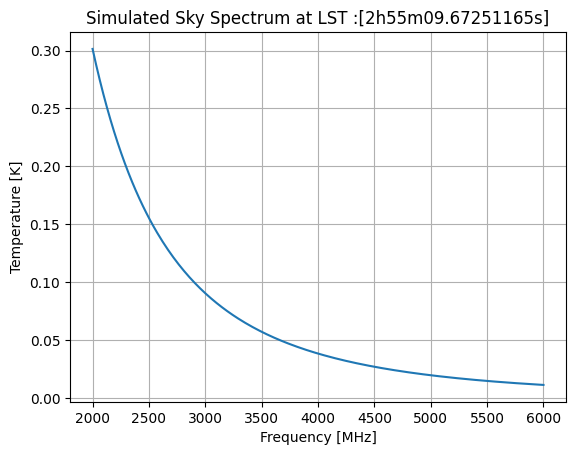

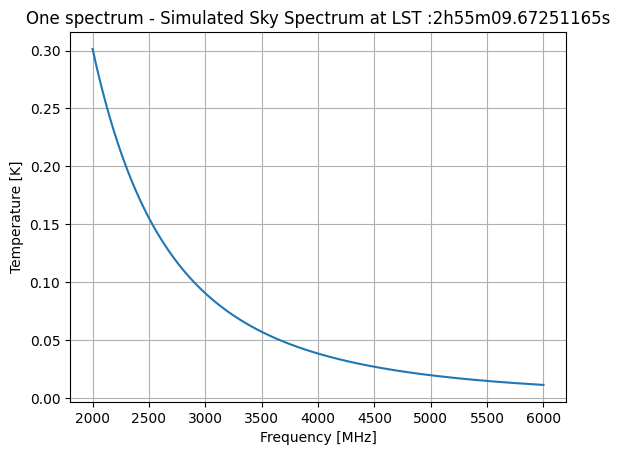

In [36]:
t = 0
while t < n_spectra:
    i = 0
    while i < 196608:  # Working on each pixel
        coords = hp.pixelfunc.pix2ang(128, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
        gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

        # Now, the coordinates in Galactic frame are changed to equatorial frame below
        equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude)

        

        # Using power law relation to fit spectra of three frequency maps
        #def func(xx, a):
            #return sky_408[i - 1] * np.power((xx / 0.408), a)

        #xx = np.array([0.408, 1.420, 23])
        #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

        #popt, pcov = curve_fit(func, xx, yy)
        #a_param = popt[0]

        j = 0
        longitudes = equi.az.value
        while j < 252:
            new_map1 = combined_array1[:,j]
            if longitudes > 359.00:
                longitudes = 359.00
            cwt = beam_def(frequencies[j], new_alt, longitudes)
            if cwt > 0:  # Adding all the three intensities
                map_1 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map1[i - 1]) / (c ** 2)
                Power = (map_1 * cwt + CMB_Int[j]) * (c * c / (1e+12 * frequencies[j] ** 2))  # +Rec_int[j]
                final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                cross_real[j] = cross_real[j] + 1 * final_temp
                sumwt[j] = sumwt[j] + cwt
            j = j + 1

        if i % 10000 == 0:
            print('Number of pixels got: ', i)

        i = i + 1

    i = 0
    while i < No_of_Channels:
        if sumwt[i] > 0:
            cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
        i = i + 1

   

    sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

    # Generating an array of random integers with mean 0 and std 1.
    array = np.random.normal(0, 1, No_of_Channels)

    # Adding the gaussian error
    cross_real = cross_real + array * sigma
    cross_imag = cross_imag + array * sigma

    spectra[t] = cross_real
    spectra_cross_imag[t] = cross_imag

    cross_real = [0] * No_of_Channels
    cross_imag = [0] * No_of_Channels
    sumwt = [0] * No_of_Channels
    sigma = [0] * No_of_Channels
    
    print("No. of spectra got = ", t + 1)

    t = t + 1

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
lst = t.sidereal_time('apparent')

i = 0
while i < n_spectra:
    plt.plot(frequencies, spectra[i])
    i = i + 1

plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s' % lst)
plt.grid()
plt.show()

plt.plot(frequencies, spectra[0])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s' % lst[0])
plt.grid()
plt.show()

In [37]:
gsm_2016 = GlobalSkyModel16()

fits_output_dir = "/Users/hshishir/Desktop/polarization_maps/U/fits_file(128)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/U/maps_tx(128)"

os.makedirs(fits_output_dir, exist_ok=True)
os.makedirs(txt_output_dir, exist_ok=True)

for freq in frequencies:
    print(f"Processing {freq} MHz...")

    map_2GHz = sky.get_emission(freq * u.GHz)
    map_2GHz_2 = map_2GHz[2]

    # Save the map as a FITS file
    fits_file_path = os.path.join(fits_output_dir, f"map_{freq}.fits")
    hp.write_map(fits_file_path, map_2GHz_2, overwrite=True)

    # Read the map from the FITS file (to ensure compatibility)
    sky_map_tx = hp.read_map(fits_file_path)

    # Save the map as a text file
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    np.savetxt(txt_file_path, sky_map_tx)

    print(f"Completed {freq} MHz.")

print("All maps have been processed and saved!")


setting the output map dtype to [dtype('float32')]


Processing 2000.0 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2000.0 MHz.
Processing 2015.9362549800796 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2015.9362549800796 MHz.
Processing 2031.8725099601593 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2031.8725099601593 MHz.
Processing 2047.8087649402391 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2047.8087649402391 MHz.
Processing 2063.7450199203186 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2063.7450199203186 MHz.
Processing 2079.6812749003984 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2079.6812749003984 MHz.
Processing 2095.6175298804783 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2095.6175298804783 MHz.
Processing 2111.5537848605577 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2111.5537848605577 MHz.
Processing 2127.4900398406376 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2127.4900398406376 MHz.
Processing 2143.426294820717 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2143.426294820717 MHz.
Processing 2159.362549800797 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2159.362549800797 MHz.
Processing 2175.2988047808767 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2175.2988047808767 MHz.
Processing 2191.235059760956 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2191.235059760956 MHz.
Processing 2207.171314741036 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2207.171314741036 MHz.
Processing 2223.1075697211154 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2223.1075697211154 MHz.
Processing 2239.0438247011953 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2239.0438247011953 MHz.
Processing 2254.980079681275 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2254.980079681275 MHz.
Processing 2270.9163346613545 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2270.9163346613545 MHz.
Processing 2286.8525896414344 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2286.8525896414344 MHz.
Processing 2302.788844621514 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2302.788844621514 MHz.
Processing 2318.7250996015937 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2318.7250996015937 MHz.
Processing 2334.6613545816735 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2334.6613545816735 MHz.
Processing 2350.597609561753 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2350.597609561753 MHz.
Processing 2366.533864541833 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2366.533864541833 MHz.
Processing 2382.4701195219122 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2382.4701195219122 MHz.
Processing 2398.406374501992 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2398.406374501992 MHz.
Processing 2414.342629482072 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2414.342629482072 MHz.
Processing 2430.2788844621514 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2430.2788844621514 MHz.
Processing 2446.2151394422312 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2446.2151394422312 MHz.
Processing 2462.1513944223107 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2462.1513944223107 MHz.
Processing 2478.0876494023905 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2478.0876494023905 MHz.
Processing 2494.02390438247 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2494.02390438247 MHz.
Processing 2509.96015936255 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2509.96015936255 MHz.
Processing 2525.896414342629 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2525.896414342629 MHz.
Processing 2541.832669322709 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2541.832669322709 MHz.
Processing 2557.768924302789 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2557.768924302789 MHz.
Processing 2573.705179282869 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2573.705179282869 MHz.
Processing 2589.641434262948 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2589.641434262948 MHz.
Processing 2605.5776892430276 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2605.5776892430276 MHz.
Processing 2621.5139442231075 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2621.5139442231075 MHz.
Processing 2637.4501992031874 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2637.4501992031874 MHz.
Processing 2653.386454183267 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2653.386454183267 MHz.
Processing 2669.3227091633466 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2669.3227091633466 MHz.
Processing 2685.258964143426 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2685.258964143426 MHz.
Processing 2701.195219123506 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2701.195219123506 MHz.
Processing 2717.131474103586 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2717.131474103586 MHz.
Processing 2733.067729083665 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2733.067729083665 MHz.
Processing 2749.003984063745 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2749.003984063745 MHz.
Processing 2764.9402390438245 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2764.9402390438245 MHz.
Processing 2780.8764940239043 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2780.8764940239043 MHz.
Processing 2796.812749003984 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2796.812749003984 MHz.
Processing 2812.7490039840636 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2812.7490039840636 MHz.
Processing 2828.6852589641435 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2828.6852589641435 MHz.
Processing 2844.621513944223 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2844.621513944223 MHz.
Processing 2860.5577689243028 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2860.5577689243028 MHz.
Processing 2876.4940239043826 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2876.4940239043826 MHz.
Processing 2892.430278884462 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2892.430278884462 MHz.
Processing 2908.366533864542 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2908.366533864542 MHz.
Processing 2924.3027888446213 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2924.3027888446213 MHz.
Processing 2940.239043824701 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2940.239043824701 MHz.
Processing 2956.175298804781 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2956.175298804781 MHz.
Processing 2972.1115537848605 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2972.1115537848605 MHz.
Processing 2988.0478087649403 MHz...


setting the output map dtype to [dtype('float32')]


Completed 2988.0478087649403 MHz.
Processing 3003.9840637450197 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3003.9840637450197 MHz.
Processing 3019.9203187250996 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3019.9203187250996 MHz.
Processing 3035.8565737051795 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3035.8565737051795 MHz.
Processing 3051.792828685259 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3051.792828685259 MHz.
Processing 3067.7290836653387 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3067.7290836653387 MHz.
Processing 3083.665338645418 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3083.665338645418 MHz.
Processing 3099.601593625498 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3099.601593625498 MHz.
Processing 3115.537848605578 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3115.537848605578 MHz.
Processing 3131.4741035856573 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3131.4741035856573 MHz.
Processing 3147.410358565737 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3147.410358565737 MHz.
Processing 3163.3466135458166 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3163.3466135458166 MHz.
Processing 3179.2828685258964 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3179.2828685258964 MHz.
Processing 3195.2191235059763 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3195.2191235059763 MHz.
Processing 3211.1553784860557 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3211.1553784860557 MHz.
Processing 3227.091633466135 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3227.091633466135 MHz.
Processing 3243.027888446215 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3243.027888446215 MHz.
Processing 3258.964143426295 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3258.964143426295 MHz.
Processing 3274.9003984063747 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3274.9003984063747 MHz.
Processing 3290.836653386454 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3290.836653386454 MHz.
Processing 3306.7729083665336 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3306.7729083665336 MHz.
Processing 3322.7091633466134 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3322.7091633466134 MHz.
Processing 3338.6454183266933 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3338.6454183266933 MHz.
Processing 3354.581673306773 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3354.581673306773 MHz.
Processing 3370.5179282868526 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3370.5179282868526 MHz.
Processing 3386.454183266932 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3386.454183266932 MHz.
Processing 3402.390438247012 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3402.390438247012 MHz.
Processing 3418.3266932270917 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3418.3266932270917 MHz.
Processing 3434.2629482071716 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3434.2629482071716 MHz.
Processing 3450.199203187251 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3450.199203187251 MHz.
Processing 3466.1354581673304 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3466.1354581673304 MHz.
Processing 3482.0717131474103 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3482.0717131474103 MHz.
Processing 3498.00796812749 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3498.00796812749 MHz.
Processing 3513.94422310757 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3513.94422310757 MHz.
Processing 3529.8804780876494 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3529.8804780876494 MHz.
Processing 3545.816733067729 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3545.816733067729 MHz.
Processing 3561.7529880478087 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3561.7529880478087 MHz.
Processing 3577.6892430278886 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3577.6892430278886 MHz.
Processing 3593.6254980079684 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3593.6254980079684 MHz.
Processing 3609.561752988048 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3609.561752988048 MHz.
Processing 3625.4980079681272 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3625.4980079681272 MHz.
Processing 3641.434262948207 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3641.434262948207 MHz.
Processing 3657.370517928287 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3657.370517928287 MHz.
Processing 3673.306772908367 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3673.306772908367 MHz.
Processing 3689.2430278884462 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3689.2430278884462 MHz.
Processing 3705.1792828685257 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3705.1792828685257 MHz.
Processing 3721.1155378486055 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3721.1155378486055 MHz.
Processing 3737.0517928286854 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3737.0517928286854 MHz.
Processing 3752.9880478087653 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3752.9880478087653 MHz.
Processing 3768.9243027888447 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3768.9243027888447 MHz.
Processing 3784.860557768924 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3784.860557768924 MHz.
Processing 3800.796812749004 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3800.796812749004 MHz.
Processing 3816.733067729084 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3816.733067729084 MHz.
Processing 3832.6693227091637 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3832.6693227091637 MHz.
Processing 3848.605577689243 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3848.605577689243 MHz.
Processing 3864.5418326693225 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3864.5418326693225 MHz.
Processing 3880.4780876494024 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3880.4780876494024 MHz.
Processing 3896.4143426294822 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3896.4143426294822 MHz.
Processing 3912.3505976095616 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3912.3505976095616 MHz.
Processing 3928.2868525896415 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3928.2868525896415 MHz.
Processing 3944.223107569721 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3944.223107569721 MHz.
Processing 3960.159362549801 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3960.159362549801 MHz.
Processing 3976.0956175298807 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3976.0956175298807 MHz.
Processing 3992.03187250996 MHz...


setting the output map dtype to [dtype('float32')]


Completed 3992.03187250996 MHz.
Processing 4007.96812749004 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4007.96812749004 MHz.
Processing 4023.9043824701193 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4023.9043824701193 MHz.
Processing 4039.840637450199 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4039.840637450199 MHz.
Processing 4055.776892430279 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4055.776892430279 MHz.
Processing 4071.7131474103585 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4071.7131474103585 MHz.
Processing 4087.6494023904384 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4087.6494023904384 MHz.
Processing 4103.585657370518 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4103.585657370518 MHz.
Processing 4119.521912350598 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4119.521912350598 MHz.
Processing 4135.4581673306775 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4135.4581673306775 MHz.
Processing 4151.394422310757 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4151.394422310757 MHz.
Processing 4167.330677290836 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4167.330677290836 MHz.
Processing 4183.266932270916 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4183.266932270916 MHz.
Processing 4199.203187250996 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4199.203187250996 MHz.
Processing 4215.139442231076 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4215.139442231076 MHz.
Processing 4231.075697211156 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4231.075697211156 MHz.
Processing 4247.011952191235 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4247.011952191235 MHz.
Processing 4262.948207171315 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4262.948207171315 MHz.
Processing 4278.8844621513945 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4278.8844621513945 MHz.
Processing 4294.820717131474 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4294.820717131474 MHz.
Processing 4310.756972111554 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4310.756972111554 MHz.
Processing 4326.693227091633 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4326.693227091633 MHz.
Processing 4342.629482071713 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4342.629482071713 MHz.
Processing 4358.565737051793 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4358.565737051793 MHz.
Processing 4374.501992031872 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4374.501992031872 MHz.
Processing 4390.438247011953 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4390.438247011953 MHz.
Processing 4406.374501992032 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4406.374501992032 MHz.
Processing 4422.310756972111 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4422.310756972111 MHz.
Processing 4438.247011952191 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4438.247011952191 MHz.
Processing 4454.18326693227 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4454.18326693227 MHz.
Processing 4470.119521912351 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4470.119521912351 MHz.
Processing 4486.05577689243 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4486.05577689243 MHz.
Processing 4501.99203187251 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4501.99203187251 MHz.
Processing 4517.92828685259 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4517.92828685259 MHz.
Processing 4533.864541832669 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4533.864541832669 MHz.
Processing 4549.8007968127495 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4549.8007968127495 MHz.
Processing 4565.737051792828 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4565.737051792828 MHz.
Processing 4581.673306772908 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4581.673306772908 MHz.
Processing 4597.609561752988 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4597.609561752988 MHz.
Processing 4613.545816733067 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4613.545816733067 MHz.
Processing 4629.482071713148 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4629.482071713148 MHz.
Processing 4645.418326693227 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4645.418326693227 MHz.
Processing 4661.354581673307 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4661.354581673307 MHz.
Processing 4677.290836653387 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4677.290836653387 MHz.
Processing 4693.2270916334655 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4693.2270916334655 MHz.
Processing 4709.163346613546 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4709.163346613546 MHz.
Processing 4725.099601593625 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4725.099601593625 MHz.
Processing 4741.035856573705 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4741.035856573705 MHz.
Processing 4756.972111553785 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4756.972111553785 MHz.
Processing 4772.908366533864 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4772.908366533864 MHz.
Processing 4788.844621513945 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4788.844621513945 MHz.
Processing 4804.780876494024 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4804.780876494024 MHz.
Processing 4820.717131474104 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4820.717131474104 MHz.
Processing 4836.653386454183 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4836.653386454183 MHz.
Processing 4852.589641434262 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4852.589641434262 MHz.
Processing 4868.525896414343 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4868.525896414343 MHz.
Processing 4884.462151394422 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4884.462151394422 MHz.
Processing 4900.398406374502 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4900.398406374502 MHz.
Processing 4916.334661354582 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4916.334661354582 MHz.
Processing 4932.270916334661 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4932.270916334661 MHz.
Processing 4948.207171314742 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4948.207171314742 MHz.
Processing 4964.1434262948205 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4964.1434262948205 MHz.
Processing 4980.0796812749 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4980.0796812749 MHz.
Processing 4996.01593625498 MHz...


setting the output map dtype to [dtype('float32')]


Completed 4996.01593625498 MHz.
Processing 5011.952191235059 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5011.952191235059 MHz.
Processing 5027.88844621514 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5027.88844621514 MHz.
Processing 5043.824701195219 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5043.824701195219 MHz.
Processing 5059.760956175299 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5059.760956175299 MHz.
Processing 5075.697211155379 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5075.697211155379 MHz.
Processing 5091.633466135458 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5091.633466135458 MHz.
Processing 5107.569721115538 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5107.569721115538 MHz.
Processing 5123.505976095617 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5123.505976095617 MHz.
Processing 5139.442231075697 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5139.442231075697 MHz.
Processing 5155.378486055777 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5155.378486055777 MHz.
Processing 5171.314741035856 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5171.314741035856 MHz.
Processing 5187.250996015937 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5187.250996015937 MHz.
Processing 5203.187250996016 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5203.187250996016 MHz.
Processing 5219.123505976096 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5219.123505976096 MHz.
Processing 5235.0597609561755 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5235.0597609561755 MHz.
Processing 5250.9960159362545 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5250.9960159362545 MHz.
Processing 5266.932270916335 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5266.932270916335 MHz.
Processing 5282.868525896414 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5282.868525896414 MHz.
Processing 5298.804780876494 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5298.804780876494 MHz.
Processing 5314.741035856574 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5314.741035856574 MHz.
Processing 5330.677290836653 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5330.677290836653 MHz.
Processing 5346.613545816734 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5346.613545816734 MHz.
Processing 5362.549800796813 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5362.549800796813 MHz.
Processing 5378.4860557768925 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5378.4860557768925 MHz.
Processing 5394.422310756972 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5394.422310756972 MHz.
Processing 5410.358565737051 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5410.358565737051 MHz.
Processing 5426.294820717132 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5426.294820717132 MHz.
Processing 5442.231075697211 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5442.231075697211 MHz.
Processing 5458.167330677291 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5458.167330677291 MHz.
Processing 5474.103585657371 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5474.103585657371 MHz.
Processing 5490.03984063745 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5490.03984063745 MHz.
Processing 5505.9760956175305 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5505.9760956175305 MHz.
Processing 5521.9123505976095 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5521.9123505976095 MHz.
Processing 5537.848605577689 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5537.848605577689 MHz.
Processing 5553.784860557769 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5553.784860557769 MHz.
Processing 5569.721115537848 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5569.721115537848 MHz.
Processing 5585.657370517929 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5585.657370517929 MHz.
Processing 5601.593625498008 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5601.593625498008 MHz.
Processing 5617.529880478088 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5617.529880478088 MHz.
Processing 5633.466135458168 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5633.466135458168 MHz.
Processing 5649.402390438247 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5649.402390438247 MHz.
Processing 5665.338645418327 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5665.338645418327 MHz.
Processing 5681.274900398406 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5681.274900398406 MHz.
Processing 5697.211155378486 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5697.211155378486 MHz.
Processing 5713.147410358566 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5713.147410358566 MHz.
Processing 5729.083665338645 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5729.083665338645 MHz.
Processing 5745.019920318726 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5745.019920318726 MHz.
Processing 5760.956175298805 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5760.956175298805 MHz.
Processing 5776.892430278885 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5776.892430278885 MHz.
Processing 5792.8286852589645 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5792.8286852589645 MHz.
Processing 5808.764940239043 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5808.764940239043 MHz.
Processing 5824.701195219123 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5824.701195219123 MHz.
Processing 5840.637450199203 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5840.637450199203 MHz.
Processing 5856.573705179283 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5856.573705179283 MHz.
Processing 5872.509960159363 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5872.509960159363 MHz.
Processing 5888.446215139442 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5888.446215139442 MHz.
Processing 5904.382470119522 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5904.382470119522 MHz.
Processing 5920.318725099602 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5920.318725099602 MHz.
Processing 5936.254980079681 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5936.254980079681 MHz.
Processing 5952.191235059761 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5952.191235059761 MHz.
Processing 5968.12749003984 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5968.12749003984 MHz.
Processing 5984.06374501992 MHz...


setting the output map dtype to [dtype('float32')]


Completed 5984.06374501992 MHz.
Processing 6000.0 MHz...
Completed 6000.0 MHz.
All maps have been processed and saved!


In [69]:
maps2 = []
combined_output_dir = "/Users/hshishir/Desktop/polarization_maps/U/maps_tx(128)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/U/maps_tx(128)"

for freq in frequencies:
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    maps2.append(np.loadtxt(txt_file_path))

combined_array2 = np.column_stack(maps2)

combined_txt_path = os.path.join(combined_output_dir, 'combined_maps2.txt')
np.savetxt(combined_txt_path, combined_array2)

print("All maps have been processed and saved!")
print("Combined Array:\n", combined_array2)

All maps have been processed and saved!
Combined Array:
 [[-1.40825750e-06 -1.37505162e-06 -1.34288109e-06 ... -5.26182937e-08
  -5.21981143e-08 -5.17823899e-08]
 [ 2.28934550e-06  2.23537063e-06  2.18307832e-06 ...  8.55734896e-08
   8.48902317e-08  8.42142143e-08]
 [ 1.54726160e-06  1.51077063e-06  1.47541755e-06 ...  5.77725920e-08
   5.73111549e-08  5.68546170e-08]
 ...
 [-4.18835725e-06 -4.08932783e-06 -3.99339206e-06 ... -1.55073693e-07
  -1.53831934e-07 -1.52603377e-07]
 [ 2.53535836e-06  2.47545358e-06  2.41741964e-06 ...  9.40881932e-08
   9.33353022e-08  9.25904189e-08]
 [-5.40454448e-06 -5.27677958e-06 -5.15300553e-06 ... -2.00208348e-07
  -1.98605420e-07 -1.97019546e-07]]


Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
Number of pixels got:  50000
Number of pixels got:  60000
Number of pixels got:  70000
Number of pixels got:  80000
Number of pixels got:  90000
Number of pixels got:  100000
Number of pixels got:  110000
Number of pixels got:  120000
Number of pixels got:  130000
Number of pixels got:  140000
Number of pixels got:  150000
Number of pixels got:  160000
Number of pixels got:  170000
Number of pixels got:  180000
Number of pixels got:  190000
No. of spectra got =  1


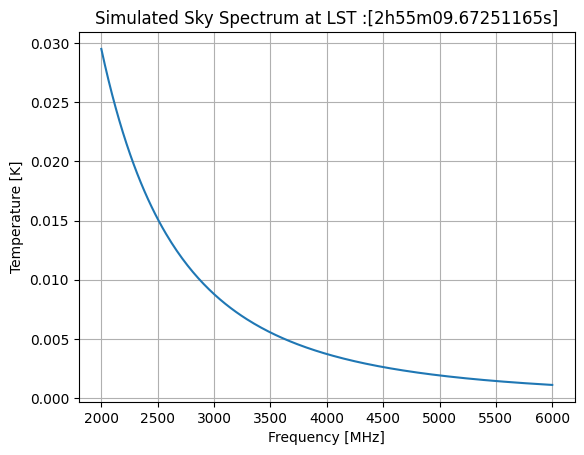

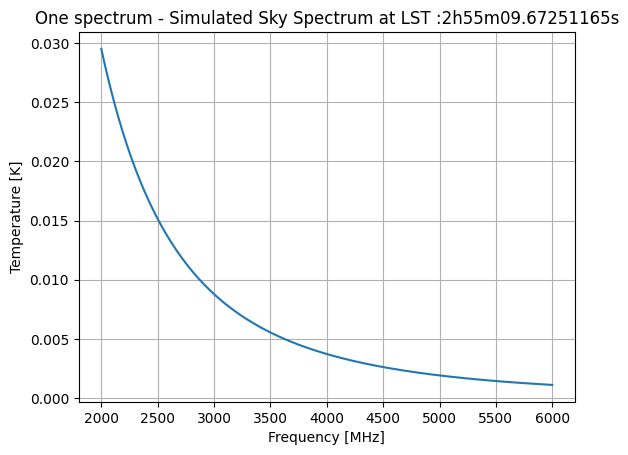

In [40]:
t = 0
while t < n_spectra:
    i = 0
    while i < 196608:  # Working on each pixel
        coords = hp.pixelfunc.pix2ang(128, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
        gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

        # Now, the coordinates in Galactic frame are changed to equatorial frame below
        equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude)

        

        # Using power law relation to fit spectra of three frequency maps
        #def func(xx, a):
            #return sky_408[i - 1] * np.power((xx / 0.408), a)

        #xx = np.array([0.408, 1.420, 23])
        #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

        #popt, pcov = curve_fit(func, xx, yy)
        #a_param = popt[0]

        j = 0
        longitudes = equi.az.value
        while j < 252:
            new_map1 = combined_array2[:,j]
            if longitudes > 359.00:
                longitudes = 359.00
            cwt = beam_def(frequencies[j], new_alt, longitudes)
            if cwt > 0:  # Adding all the three intensities
                map_1 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map1[i - 1]) / (c ** 2)
                Power = (map_1 * cwt + CMB_Int[j]) * (c * c / (1e+12 * frequencies[j] ** 2))  # +Rec_int[j]
                final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                cross_real[j] = cross_real[j] + 1 * final_temp
                sumwt[j] = sumwt[j] + cwt
            j = j + 1

        if i % 10000 == 0:
            print('Number of pixels got: ', i)

        i = i + 1

    i = 0
    while i < No_of_Channels:
        if sumwt[i] > 0:
            cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
        i = i + 1

   

    sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

    # Generating an array of random integers with mean 0 and std 1.
    array = np.random.normal(0, 1, No_of_Channels)

    # Adding the gaussian error
    cross_real = cross_real + array * sigma
    cross_imag = cross_imag + array * sigma

    spectra[t] = cross_real
    spectra_cross_imag[t] = cross_imag

    cross_real = [0] * No_of_Channels
    cross_imag = [0] * No_of_Channels
    sumwt = [0] * No_of_Channels
    sigma = [0] * No_of_Channels
    
    print("No. of spectra got = ", t + 1)

    t = t + 1

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
lst = t.sidereal_time('apparent')

i = 0
while i < n_spectra:
    plt.plot(frequencies, spectra[i])
    i = i + 1

plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s' % lst)
plt.grid()
plt.show()

plt.plot(frequencies, spectra[0])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s' % lst[0])
plt.grid()
plt.show()

In [33]:
def mixing_matrix(frequencies, alt, az):
    sin_theta = (np.sin(alt*np.pi/180))**2

    matrix = np.array([[sin_theta * 0.5, 0.0],
                       [0.0, sin_theta * 0.5]], dtype=complex)
    
    return matrix

def kronecker_product_with_conjugate(matrix):
    conjugate_matrix = np.conjugate(matrix)
    
    kronecker_product = np.kron(matrix, conjugate_matrix)
    
    return kronecker_product

def multiply_matrices(matrix1, matrix2):
    result = np.dot(matrix1, matrix2)
    return result

matrix = create_matrix(theta)
kronecker_product = kronecker_product_with_conjugate(matrix)

given_matrix = np.array([[0.5, 0.5, 0, 0],
                         [0, 0, 0.5, 0.5*1j],
                         [0, 0, 1, -0.5*1j],
                         [0.5, -0.5, 0, 0]], dtype=complex)

result = multiply_matrices(kronecker_product, given_matrix)

Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
Number of pixels got:  50000
Number of pixels got:  60000
Number of pixels got:  70000
Number of pixels got:  80000
Number of pixels got:  90000
Number of pixels got:  100000
Number of pixels got:  110000
Number of pixels got:  120000
Number of pixels got:  130000
Number of pixels got:  140000
Number of pixels got:  150000
Number of pixels got:  160000
Number of pixels got:  170000
Number of pixels got:  180000
Number of pixels got:  190000
No. of spectra got =  1


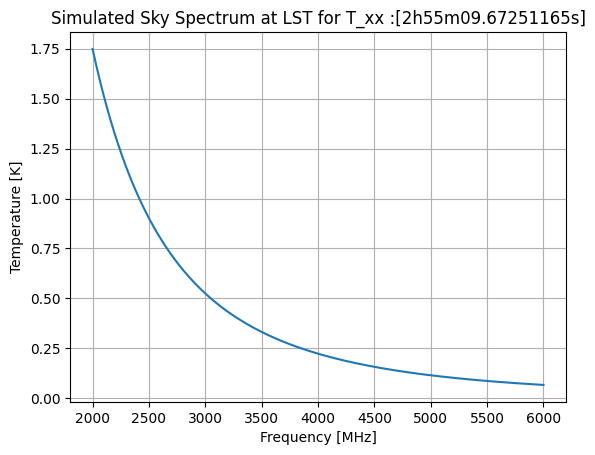

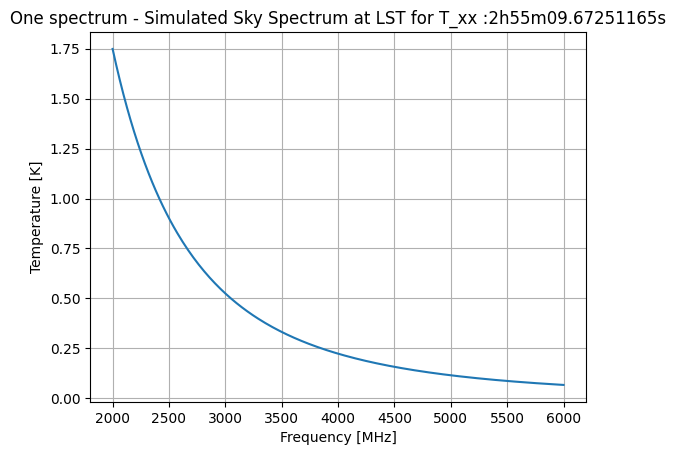

In [35]:
t = 0
while t < n_spectra:
    i = 0
    while i < 196608:  # Working on each pixel
        coords = hp.pixelfunc.pix2ang(128, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
        gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

        # Now, the coordinates in Galactic frame are changed to equatorial frame below
        equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude)

        

        # Using power law relation to fit spectra of three frequency maps
        #def func(xx, a):
            #return sky_408[i - 1] * np.power((xx / 0.408), a)

        #xx = np.array([0.408, 1.420, 23])
        #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

        #popt, pcov = curve_fit(func, xx, yy)
        #a_param = popt[0]

        j = 0
        longitudes = equi.az.value
        while j < 252:
            new_map = combined_array[:,j]
            new_map1 = combined_array1[:,j]
            new_map2 = combined_array2[:,j]
            if longitudes > 359.00:
                longitudes = 359.00
            cwt = np.sqrt((result[0,0]**2) + (result[0,1]**2) + (result[0,2]**2) + (result[0,3]**2))

            if cwt > 0:  # Adding all the three intensities
                map_0 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map[i - 1]) / (c ** 2)
                map_1 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map1[i - 1]) / (c ** 2)
                map_2 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map2[i - 1]) / (c ** 2)
                Power = (( (map_0 * result[0,0]) + (map_1 * result[0,1]) + (map_2 * result[0,2]) + (0 * result[0,3]) ) + CMB_Int[j]) * (c * c / (1e+12 * frequencies[j] ** 2))  # +Rec_int[j]
                final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                cross_real[j] = cross_real[j] + 1 * final_temp
                sumwt[j] = sumwt[j] + cwt
            j = j + 1

        if i % 10000 == 0:
            print('Number of pixels got: ', i)

        i = i + 1

    i = 0
    while i < No_of_Channels:
        if sumwt[i] > 0:
            cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
        i = i + 1

   

    sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

    # Generating an array of random integers with mean 0 and std 1.
    array = np.random.normal(0, 1, No_of_Channels)

    # Adding the gaussian error
    cross_real = cross_real + array * sigma
    cross_imag = cross_imag + array * sigma

    spectra[t] = cross_real
    spectra_cross_imag[t] = cross_imag

    cross_real = [0] * No_of_Channels
    cross_imag = [0] * No_of_Channels
    sumwt = [0] * No_of_Channels
    sigma = [0] * No_of_Channels
    
    print("No. of spectra got = ", t + 1)

    t = t + 1

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
lst = t.sidereal_time('apparent')

i = 0
while i < n_spectra:
    plt.plot(frequencies, spectra[i])
    i = i + 1

plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST for T_xx :%s' % lst)
plt.grid()
plt.show()

plt.plot(frequencies, spectra[0])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST for T_xx :%s' % lst[0])
plt.grid()
plt.show()

Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
Number of pixels got:  50000
Number of pixels got:  60000
Number of pixels got:  70000
Number of pixels got:  80000
Number of pixels got:  90000
Number of pixels got:  100000
Number of pixels got:  110000
Number of pixels got:  120000
Number of pixels got:  130000
Number of pixels got:  140000
Number of pixels got:  150000
Number of pixels got:  160000
Number of pixels got:  170000
Number of pixels got:  180000
Number of pixels got:  190000
No. of spectra got =  1


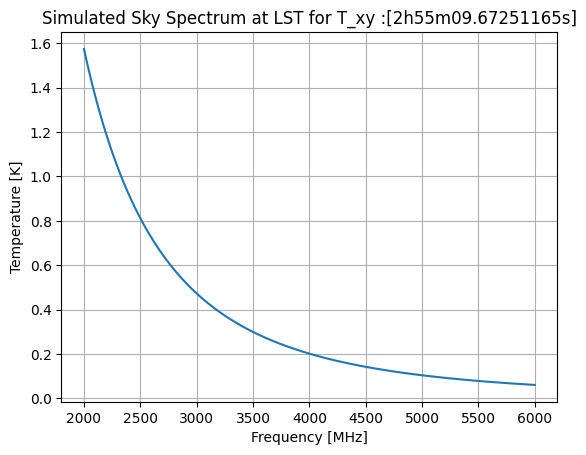

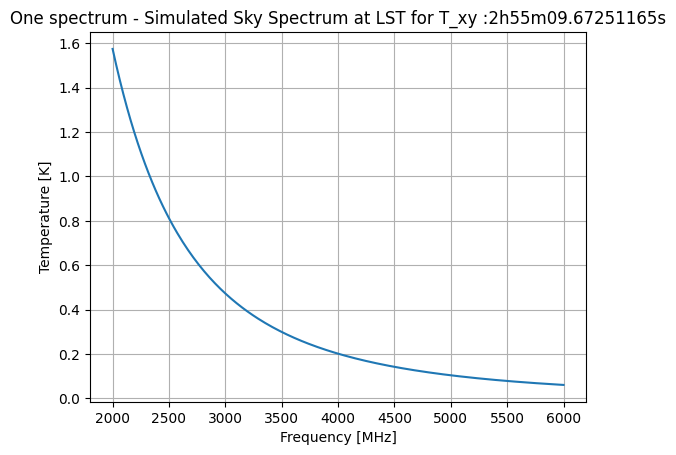

In [36]:
t = 0
while t < n_spectra:
    i = 0
    while i < 196608:  # Working on each pixel
        coords = hp.pixelfunc.pix2ang(128, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
        gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

        # Now, the coordinates in Galactic frame are changed to equatorial frame below
        equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude)

        

        # Using power law relation to fit spectra of three frequency maps
        #def func(xx, a):
            #return sky_408[i - 1] * np.power((xx / 0.408), a)

        #xx = np.array([0.408, 1.420, 23])
        #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

        #popt, pcov = curve_fit(func, xx, yy)
        #a_param = popt[0]

        j = 0
        longitudes = equi.az.value
        while j < 252:
            new_map = combined_array[:,j]
            new_map1 = combined_array1[:,j]
            new_map2 = combined_array2[:,j]
            if longitudes > 359.00:
                longitudes = 359.00
            cwt = np.sqrt((result[1,0]**2) + (result[1,1]**2) + (result[1,2]**2) + (result[1,3]**2))

            if cwt > 0:  # Adding all the three intensities
                map_0 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map[i - 1]) / (c ** 2)
                map_1 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map1[i - 1]) / (c ** 2)
                map_2 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map2[i - 1]) / (c ** 2)
                Power = (( (map_0 * result[1,0]) + (map_1 * result[1,1]) + (map_2 * result[1,2]) + (0 * result[1,3]) ) + CMB_Int[j]) * (c * c / (1e+12 * frequencies[j] ** 2))  # +Rec_int[j]
                final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                cross_real[j] = cross_real[j] + 1 * final_temp
                sumwt[j] = sumwt[j] + cwt
            j = j + 1

        if i % 10000 == 0:
            print('Number of pixels got: ', i)

        i = i + 1

    i = 0
    while i < No_of_Channels:
        if sumwt[i] > 0:
            cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
        i = i + 1

   

    sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

    # Generating an array of random integers with mean 0 and std 1.
    array = np.random.normal(0, 1, No_of_Channels)

    # Adding the gaussian error
    cross_real = cross_real + array * sigma
    cross_imag = cross_imag + array * sigma

    spectra[t] = cross_real
    spectra_cross_imag[t] = cross_imag

    cross_real = [0] * No_of_Channels
    cross_imag = [0] * No_of_Channels
    sumwt = [0] * No_of_Channels
    sigma = [0] * No_of_Channels
    
    print("No. of spectra got = ", t + 1)

    t = t + 1

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
lst = t.sidereal_time('apparent')

i = 0
while i < n_spectra:
    plt.plot(frequencies, spectra[i])
    i = i + 1

plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST for T_xy :%s' % lst)
plt.grid()
plt.show()

plt.plot(frequencies, spectra[0])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST for T_xy :%s' % lst[0])
plt.grid()
plt.show()

Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
Number of pixels got:  50000
Number of pixels got:  60000
Number of pixels got:  70000
Number of pixels got:  80000
Number of pixels got:  90000
Number of pixels got:  100000
Number of pixels got:  110000
Number of pixels got:  120000
Number of pixels got:  130000
Number of pixels got:  140000
Number of pixels got:  150000
Number of pixels got:  160000
Number of pixels got:  170000
Number of pixels got:  180000
Number of pixels got:  190000
No. of spectra got =  1


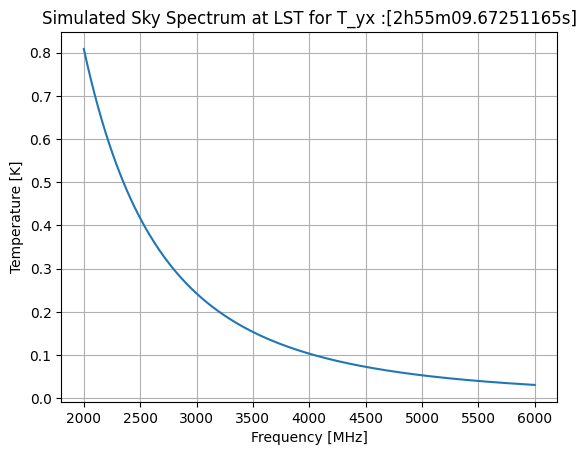

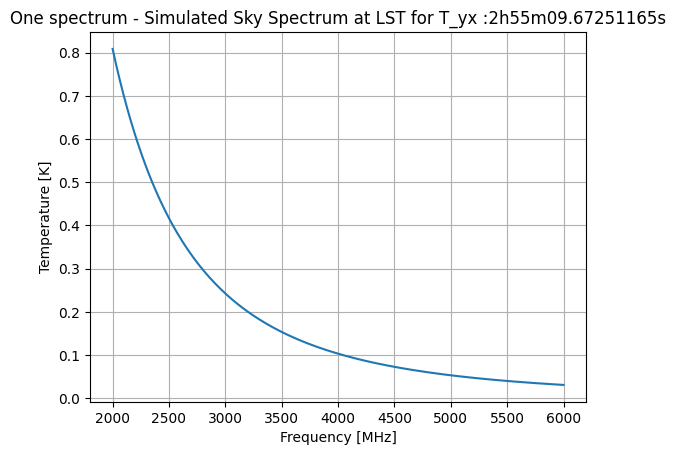

In [37]:
t = 0
while t < n_spectra:
    i = 0
    while i < 196608:  # Working on each pixel
        coords = hp.pixelfunc.pix2ang(128, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
        gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

        # Now, the coordinates in Galactic frame are changed to equatorial frame below
        equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude)

        

        # Using power law relation to fit spectra of three frequency maps
        #def func(xx, a):
            #return sky_408[i - 1] * np.power((xx / 0.408), a)

        #xx = np.array([0.408, 1.420, 23])
        #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

        #popt, pcov = curve_fit(func, xx, yy)
        #a_param = popt[0]

        j = 0
        longitudes = equi.az.value
        while j < 252:
            new_map = combined_array[:,j]
            new_map1 = combined_array1[:,j]
            new_map2 = combined_array2[:,j]
            if longitudes > 359.00:
                longitudes = 359.00
            cwt = np.sqrt((result[2,0]**2) + (result[2,1]**2) + (result[2,2]**2) + (result[2,3]**2))

            if cwt > 0:  # Adding all the three intensities
                map_0 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map[i - 1]) / (c ** 2)
                map_1 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map1[i - 1]) / (c ** 2)
                map_2 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map2[i - 1]) / (c ** 2)
                Power = (( (map_0 * result[2,0]) + (map_1 * result[2,1]) + (map_2 * result[2,2]) + (0 * result[2,3]) ) + CMB_Int[j]) * (c * c / (1e+12 * frequencies[j] ** 2))  # +Rec_int[j]
                final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                cross_real[j] = cross_real[j] + 1 * final_temp
                sumwt[j] = sumwt[j] + cwt
            j = j + 1

        if i % 10000 == 0:
            print('Number of pixels got: ', i)

        i = i + 1

    i = 0
    while i < No_of_Channels:
        if sumwt[i] > 0:
            cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
        i = i + 1

   

    sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

    # Generating an array of random integers with mean 0 and std 1.
    array = np.random.normal(0, 1, No_of_Channels)

    # Adding the gaussian error
    cross_real = cross_real + array * sigma
    cross_imag = cross_imag + array * sigma

    spectra[t] = cross_real
    spectra_cross_imag[t] = cross_imag

    cross_real = [0] * No_of_Channels
    cross_imag = [0] * No_of_Channels
    sumwt = [0] * No_of_Channels
    sigma = [0] * No_of_Channels
    
    print("No. of spectra got = ", t + 1)

    t = t + 1

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
lst = t.sidereal_time('apparent')

i = 0
while i < n_spectra:
    plt.plot(frequencies, spectra[i])
    i = i + 1

plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST for T_yx :%s' % lst)
plt.grid()
plt.show()

plt.plot(frequencies, spectra[0])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST for T_yx :%s' % lst[0])
plt.grid()
plt.show()

Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
Number of pixels got:  50000
Number of pixels got:  60000
Number of pixels got:  70000
Number of pixels got:  80000
Number of pixels got:  90000
Number of pixels got:  100000
Number of pixels got:  110000
Number of pixels got:  120000
Number of pixels got:  130000
Number of pixels got:  140000
Number of pixels got:  150000
Number of pixels got:  160000
Number of pixels got:  170000
Number of pixels got:  180000
Number of pixels got:  190000
No. of spectra got =  1


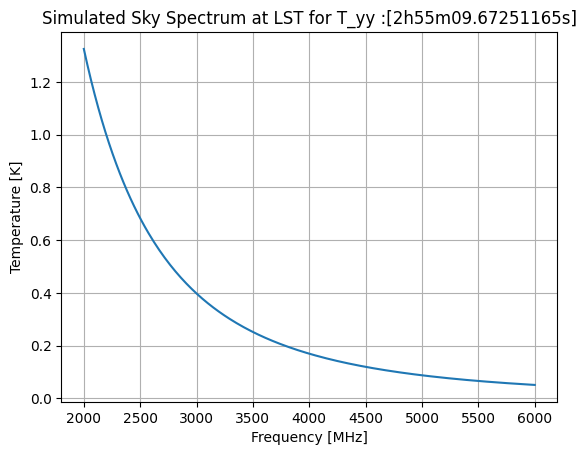

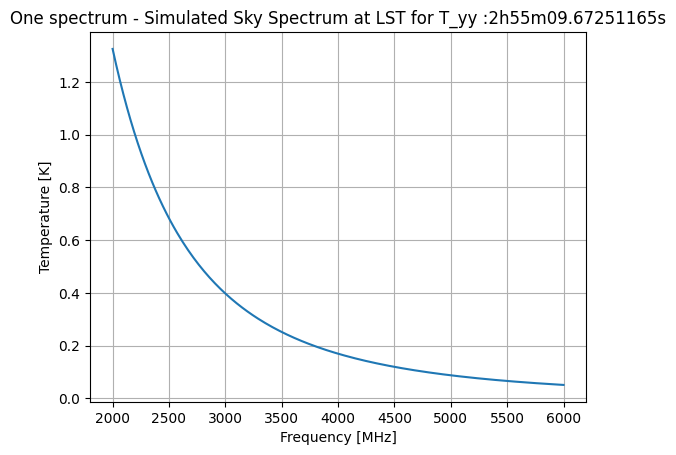

In [38]:
t = 0
while t < n_spectra:
    i = 0
    while i < 196608:  # Working on each pixel
        coords = hp.pixelfunc.pix2ang(128, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
        gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

        # Now, the coordinates in Galactic frame are changed to equatorial frame below
        equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude)

        

        # Using power law relation to fit spectra of three frequency maps
        #def func(xx, a):
            #return sky_408[i - 1] * np.power((xx / 0.408), a)

        #xx = np.array([0.408, 1.420, 23])
        #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

        #popt, pcov = curve_fit(func, xx, yy)
        #a_param = popt[0]

        j = 0
        longitudes = equi.az.value
        while j < 252:
            new_map = combined_array[:,j]
            new_map1 = combined_array1[:,j]
            new_map2 = combined_array2[:,j]
            if longitudes > 359.00:
                longitudes = 359.00
            cwt = np.sqrt((result[3,0]**2) + (result[3,1]**2) + (result[3,2]**2) + (result[3,3]**2))

            if cwt > 0:  # Adding all the three intensities
                map_0 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map[i - 1]) / (c ** 2)
                map_1 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map1[i - 1]) / (c ** 2)
                map_2 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map2[i - 1]) / (c ** 2)
                Power = (( (map_0 * result[3,0]) + (map_1 * result[3,1]) + (map_2 * result[3,2]) + (0 * result[3,3]) ) + CMB_Int[j]) * (c * c / (1e+12 * frequencies[j] ** 2))  # +Rec_int[j]
                final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                cross_real[j] = cross_real[j] + 1 * final_temp
                sumwt[j] = sumwt[j] + cwt
            j = j + 1

        if i % 10000 == 0:
            print('Number of pixels got: ', i)

        i = i + 1

    i = 0
    while i < No_of_Channels:
        if sumwt[i] > 0:
            cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
        i = i + 1

   

    sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

    # Generating an array of random integers with mean 0 and std 1.
    array = np.random.normal(0, 1, No_of_Channels)

    # Adding the gaussian error
    cross_real = cross_real + array * sigma
    cross_imag = cross_imag + array * sigma

    spectra[t] = cross_real
    spectra_cross_imag[t] = cross_imag

    cross_real = [0] * No_of_Channels
    cross_imag = [0] * No_of_Channels
    sumwt = [0] * No_of_Channels
    sigma = [0] * No_of_Channels
    
    print("No. of spectra got = ", t + 1)

    t = t + 1

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
lst = t.sidereal_time('apparent')

i = 0
while i < n_spectra:
    plt.plot(frequencies, spectra[i])
    i = i + 1

plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST for T_yy :%s' % lst)
plt.grid()
plt.show()

plt.plot(frequencies, spectra[0])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST for T_yy :%s' % lst[0])
plt.grid()
plt.show()

Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


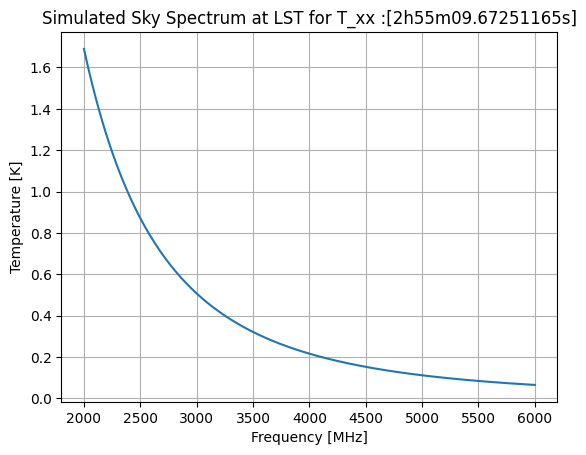

h = 0 is completed
Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


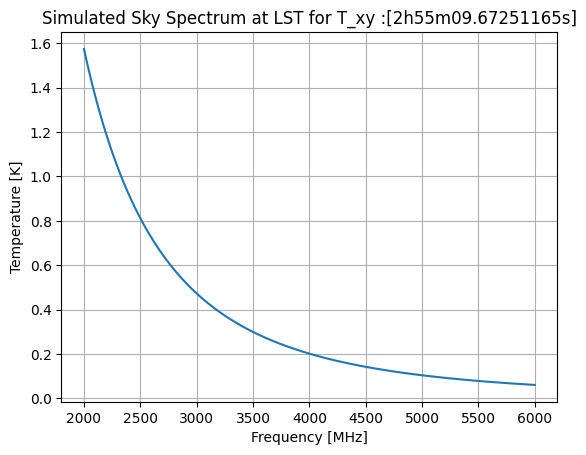

h = 1 is completed
Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


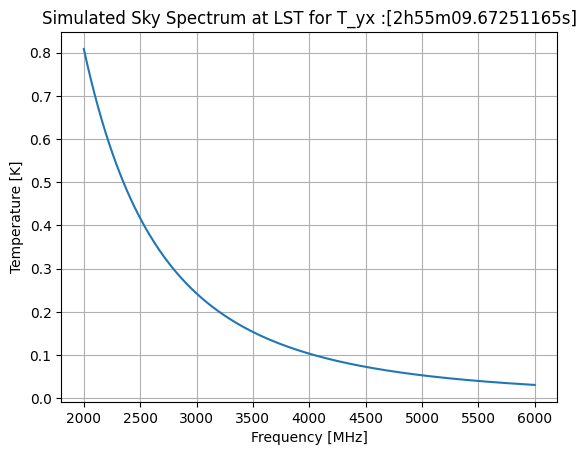

h = 2 is completed
Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


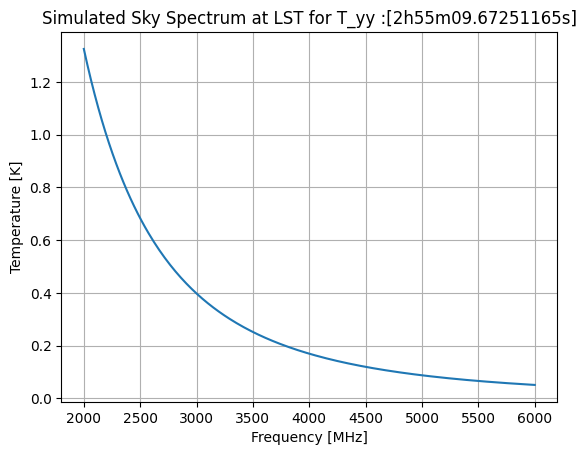

h = 3 is completed


In [46]:
titles = ["T_xx", "T_xy", "T_yx", "T_yy"]

for h in range(4):

    t = 0
    while t < n_spectra:
        i = 0
        while i < 196608:  # Working on each pixel
            coords = hp.pixelfunc.pix2ang(128, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
            gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

            # Now, the coordinates in Galactic frame are changed to equatorial frame below
            equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
            alt = equi.alt.value
            new_alt = refraction(alt, altitude)

        

            # Using power law relation to fit spectra of three frequency maps
            #def func(xx, a):
                #return sky_408[i - 1] * np.power((xx / 0.408), a)

            #xx = np.array([0.408, 1.420, 23])
            #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

            #popt, pcov = curve_fit(func, xx, yy)
            #a_param = popt[0]

            j = 0
            longitudes = equi.az.value
            while j < 252:
                new_map = combined_array[:,j]
                new_map1 = combined_array1[:,j]
                new_map2 = combined_array2[:,j]
                if longitudes > 359.00:
                    longitudes = 359.00
                cwt = np.sqrt((result[h,0]**2) + (result[h,1]**2) + (result[h,2]**2) + (result[h,3]**2))

                if cwt > 0:  # Adding all the three intensities
                    map_0 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map[i - 1]) / (c ** 2)
                    map_1 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map1[i - 1]) / (c ** 2)
                    map_2 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map2[i - 1]) / (c ** 2)
                    Power = (( (map_0 * result[h,0]) + (map_1 * result[h,1]) + (map_2 * result[h,2]) + (0 * result[h,3]) ) + CMB_Int[j]) * (c * c / (1e+12 * frequencies[j] ** 2))  # +Rec_int[j]
                    final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                    cross_real[j] = cross_real[j] + 1 * final_temp
                    sumwt[j] = sumwt[j] + cwt
                j = j + 1

            if i % 50000 == 0:
                print('Number of pixels got: ', i)

            i = i + 1

        i = 0
        while i < No_of_Channels:
            if sumwt[i] > 0:
                cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
            i = i + 1

   

        sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

        # Generating an array of random integers with mean 0 and std 1.
        array = np.random.normal(0, 1, No_of_Channels)

        # Adding the gaussian error
        cross_real = cross_real + array * sigma
        cross_imag = cross_imag + array * sigma

        spectra[t] = cross_real
        spectra_cross_imag[t] = cross_imag

        cross_real = [0] * No_of_Channels
        cross_imag = [0] * No_of_Channels
        sumwt = [0] * No_of_Channels
        sigma = [0] * No_of_Channels
    
        print("No. of spectra got = ", t + 1)

        t = t + 1

    Obs = ephem.Observer()
    t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
    lst = t.sidereal_time('apparent')

    i = 0
    while i < n_spectra:
        plt.plot(frequencies, spectra[i])
        i = i + 1

    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Temperature [K]')
    plt.title(f"Simulated Sky Spectrum at LST for {titles[h]} :%s" % lst)
    plt.grid()
    plt.show()

    print(f"h = {h} is completed")

    #plt.plot(frequencies, spectra[0])
    #plt.xlabel('Frequency [MHz]')
    #plt.ylabel('Temperature [K]')
    #plt.title('One spectrum - Simulated Sky Spectrum at LST for T_yy :%s' % lst[0])
    #plt.grid()
    #plt.show()

In [83]:
def mixing_matrix(freq, alt, az):
    sin_theta = (np.sin(alt*np.pi/180))**2

    matrix = np.array([[sin_theta * 0.3, sin_theta *0.15],
                       [sin_theta *0.15, sin_theta * 0.4]], dtype=complex)
    
    return matrix

def kronecker_product_with_conjugate(matrix):
    conjugate_matrix = np.conjugate(matrix)
    
    kronecker_product = np.kron(matrix, conjugate_matrix)
    
    return kronecker_product

def multiply_matrices(matrix1, matrix2):
    result = np.dot(matrix1, matrix2)
    return result

az = 0
matrix1 = mixing_matrix(freq, alt, az)
kronecker_product1 = kronecker_product_with_conjugate(matrix1)

given_matrix = np.array([[0.5, 0.5, 0, 0],
                         [0, 0, 0.5, 0.5*1j],
                         [0, 0, 1, -0.5*1j],
                         [0.5, -0.5, 0, 0]], dtype=complex)

result1 = multiply_matrices(kronecker_product1, given_matrix)

Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


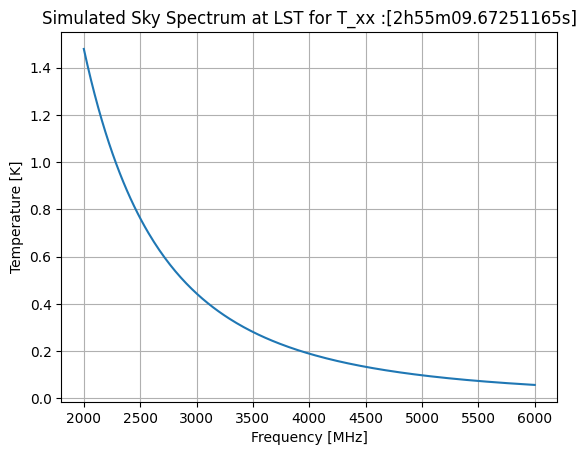

h = 0 is completed
Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


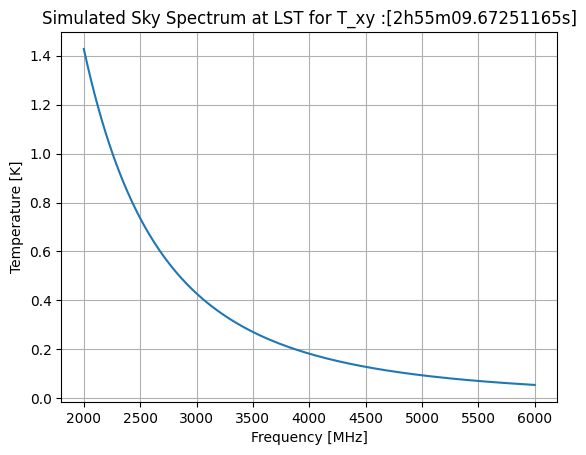

h = 1 is completed
Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


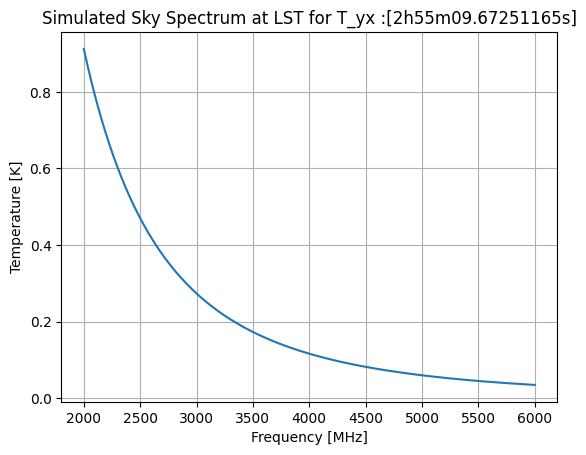

h = 2 is completed
Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


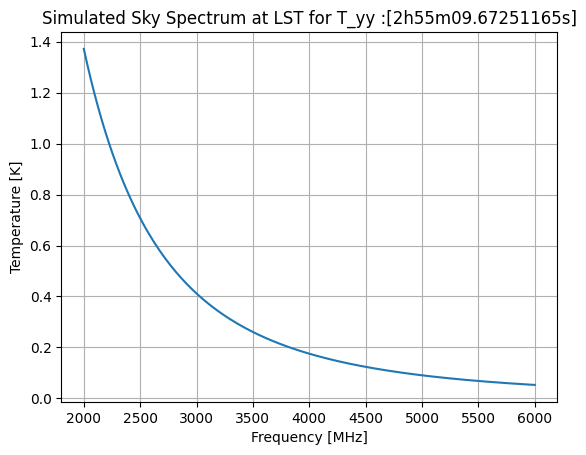

h = 3 is completed


In [84]:
titles = ["T_xx", "T_xy", "T_yx", "T_yy"]

for h in range(4):

    t = 0
    while t < n_spectra:
        i = 0
        while i < 196608:  # Working on each pixel
            coords = hp.pixelfunc.pix2ang(128, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
            gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

            # Now, the coordinates in Galactic frame are changed to equatorial frame below
            equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
            alt = equi.alt.value
            new_alt = refraction(alt, altitude)

        

            # Using power law relation to fit spectra of three frequency maps
            #def func(xx, a):
                #return sky_408[i - 1] * np.power((xx / 0.408), a)

            #xx = np.array([0.408, 1.420, 23])
            #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

            #popt, pcov = curve_fit(func, xx, yy)
            #a_param = popt[0]

            j = 0
            longitudes = equi.az.value
            while j < 252:
                new_map = combined_array[:,j]
                new_map1 = combined_array1[:,j]
                new_map2 = combined_array2[:,j]
                if longitudes > 359.00:
                    longitudes = 359.00
                cwt = np.sqrt((result1[h,0]**2) + (result1[h,1]**2) + (result1[h,2]**2) + (result1[h,3]**2))

                if cwt > 0:  # Adding all the three intensities
                    map_0 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map[i - 1]) / (c ** 2)
                    map_1 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map1[i - 1]) / (c ** 2)
                    map_2 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map2[i - 1]) / (c ** 2)
                    Power = (( (map_0 * result1[h,0]) + (map_1 * result1[h,1]) + (map_2 * result1[h,2]) + (0 * result1[h,3]) ) + CMB_Int[j]) * (c * c / (1e+12 * frequencies[j] ** 2))  # +Rec_int[j]
                    final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                    cross_real[j] = cross_real[j] + 1 * final_temp
                    sumwt[j] = sumwt[j] + cwt
                j = j + 1

            if i % 50000 == 0:
                print('Number of pixels got: ', i)

            i = i + 1

        i = 0
        while i < No_of_Channels:
            if sumwt[i] > 0:
                cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
            i = i + 1

   

        sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

        # Generating an array of random integers with mean 0 and std 1.
        array = np.random.normal(0, 1, No_of_Channels)

        # Adding the gaussian error
        cross_real = cross_real + array * sigma
        cross_imag = cross_imag + array * sigma

        spectra[t] = cross_real
        spectra_cross_imag[t] = cross_imag

        cross_real = [0] * No_of_Channels
        cross_imag = [0] * No_of_Channels
        sumwt = [0] * No_of_Channels
        sigma = [0] * No_of_Channels
    
        print("No. of spectra got = ", t + 1)

        t = t + 1

    Obs = ephem.Observer()
    t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
    lst = t.sidereal_time('apparent')

    i = 0
    while i < n_spectra:
        plt.plot(frequencies, spectra[i])
        i = i + 1

    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Temperature [K]')
    plt.title(f"Simulated Sky Spectrum at LST for {titles[h]} :%s" % lst)
    plt.grid()
    plt.show()

    print(f"h = {h} is completed")

    #plt.plot(frequencies, spectra[0])
    #plt.xlabel('Frequency [MHz]')
    #plt.ylabel('Temperature [K]')
    #plt.title('One spectrum - Simulated Sky Spectrum at LST for T_yy :%s' % lst[0])
    #plt.grid()
    #plt.show()

In [85]:
def mixing_matrix(frequencies, alt, az):
    sin_theta = (np.sin(alt*np.pi/180*(frequencies/23000000)))**2

    matrix = np.array([[sin_theta * 0.15, sin_theta *0.3],
                       [sin_theta *0.4, sin_theta * 0.15]], dtype=complex)
    
    return matrix

def kronecker_product_with_conjugate(matrix):
    conjugate_matrix = np.conjugate(matrix)
    
    kronecker_product = np.kron(matrix, conjugate_matrix)
    
    return kronecker_product

def multiply_matrices(matrix1, matrix2):
    result = np.dot(matrix1, matrix2)
    return result

az = 0
matrix2 = mixing_matrix(freq, alt, az)
kronecker_product2 = kronecker_product_with_conjugate(matrix2)

given_matrix = np.array([[0.5, 0.5, 0, 0],
                         [0, 0, 0.5, 0.5*1j],
                         [0, 0, 1, -0.5*1j],
                         [0.5, -0.5, 0, 0]], dtype=complex)

result2 = multiply_matrices(kronecker_product2, given_matrix)

Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


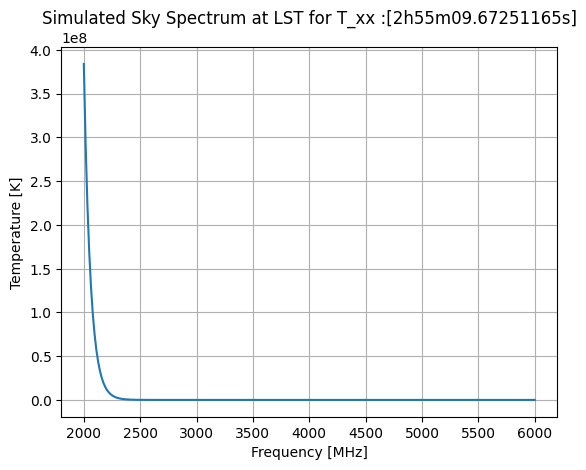

h = 0 is completed
Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


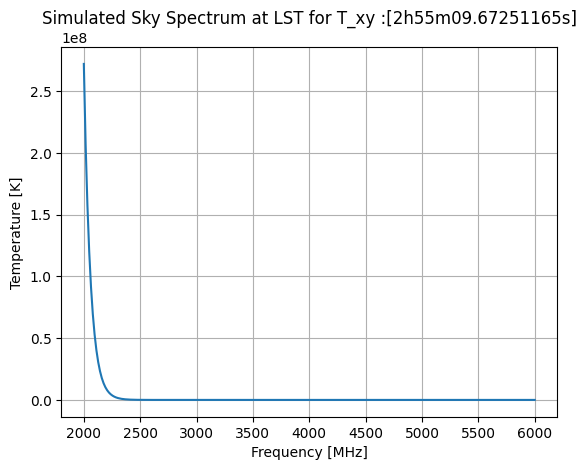

h = 1 is completed
Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


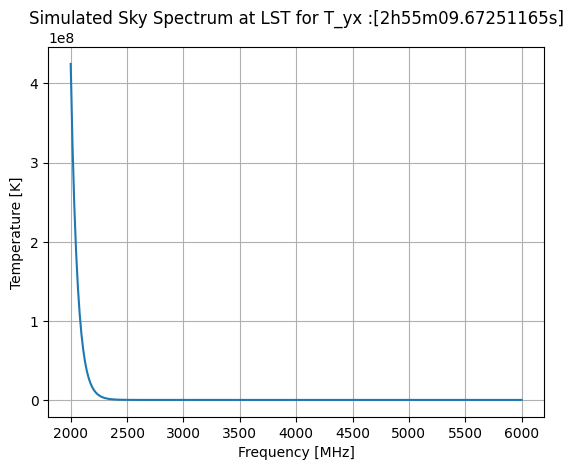

h = 2 is completed
Number of pixels got:  0
Number of pixels got:  50000
Number of pixels got:  100000
Number of pixels got:  150000
No. of spectra got =  1


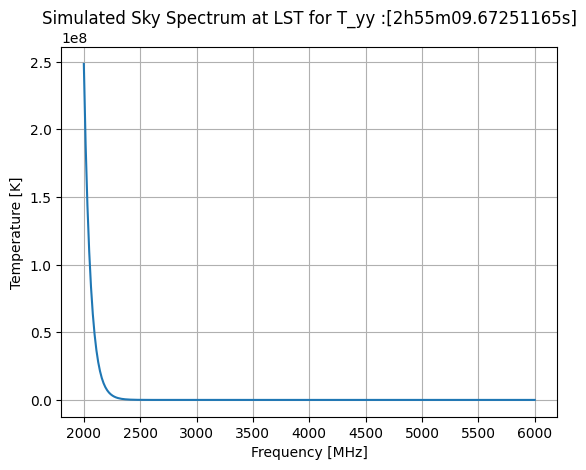

h = 3 is completed


In [86]:
titles = ["T_xx", "T_xy", "T_yx", "T_yy"]

for h in range(4):

    t = 0
    while t < n_spectra:
        i = 0
        while i < 196608:  # Working on each pixel
            coords = hp.pixelfunc.pix2ang(128, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
            gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

            # Now, the coordinates in Galactic frame are changed to equatorial frame below
            equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
            alt = equi.alt.value
            new_alt = refraction(alt, altitude)

        

            # Using power law relation to fit spectra of three frequency maps
            #def func(xx, a):
                #return sky_408[i - 1] * np.power((xx / 0.408), a)

            #xx = np.array([0.408, 1.420, 23])
            #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

            #popt, pcov = curve_fit(func, xx, yy)
            #a_param = popt[0]

            j = 0
            longitudes = equi.az.value
            while j < 252:
                new_map = combined_array[:,j]
                new_map1 = combined_array1[:,j]
                new_map2 = combined_array2[:,j]
                if longitudes > 359.00:
                    longitudes = 359.00
                cwt = np.sqrt((result2[h,0]**2) + (result2[h,1]**2) + (result2[h,2]**2) + (result2[h,3]**2))

                if cwt > 0:  # Adding all the three intensities
                    map_0 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map[i - 1]) / (c ** 2)
                    map_1 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map1[i - 1]) / (c ** 2)
                    map_2 = (2 * k * 1e+12 * (frequencies[j] ** 2) * 1e+4 *new_map2[i - 1]) / (c ** 2)
                    Power = (( (map_0 * result2[h,0]) + (map_1 * result2[h,1]) + (map_2 * result2[h,2]) + (0 * result2[h,3]) ) + CMB_Int[j]) * (c * c / (1e+12 * frequencies[j] ** 2))  # +Rec_int[j]
                    final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                    cross_real[j] = cross_real[j] + 1 * final_temp
                    sumwt[j] = sumwt[j] + cwt
                j = j + 1

            if i % 50000 == 0:
                print('Number of pixels got: ', i)

            i = i + 1

        i = 0
        while i < No_of_Channels:
            if sumwt[i] > 0:
                cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
            i = i + 1

   

        sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

        # Generating an array of random integers with mean 0 and std 1.
        array = np.random.normal(0, 1, No_of_Channels)

        # Adding the gaussian error
        cross_real = cross_real + array * sigma
        cross_imag = cross_imag + array * sigma

        spectra[t] = cross_real
        spectra_cross_imag[t] = cross_imag

        cross_real = [0] * No_of_Channels
        cross_imag = [0] * No_of_Channels
        sumwt = [0] * No_of_Channels
        sigma = [0] * No_of_Channels
    
        print("No. of spectra got = ", t + 1)

        t = t + 1

    Obs = ephem.Observer()
    t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
    lst = t.sidereal_time('apparent')

    i = 0
    while i < n_spectra:
        plt.plot(frequencies, spectra[i])
        i = i + 1

    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Temperature [K]')
    plt.title(f"Simulated Sky Spectrum at LST for {titles[h]} :%s" % lst)
    plt.grid()
    plt.show()

    print(f"h = {h} is completed")

    #plt.plot(frequencies, spectra[0])
    #plt.xlabel('Frequency [MHz]')
    #plt.ylabel('Temperature [K]')
    #plt.title('One spectrum - Simulated Sky Spectrum at LST for T_yy :%s' % lst[0])
    #plt.grid()
    #plt.show()